# Mid Project "E-Commerce Ecosystem"

The dataset is from Data.GOV you can view it from this link
https://catalog.data.gov/dataset/state-agency-amazon-spend-fiscal-year-25


## Questions

1) What are the best-selling product categories and brands?
2) How does seller profit vary across different product categories?
3) How does purchase PPU influence seller profit across different product category?
4) How does item tax vary across different product categories?
5) How do item shipping & handling costs vary across different manufacturers ?
6) What is the relationship between item tax and payment amount across different product categories?
7) How does order delivery time vary across different product categories and brands?
8) How do sales trends vary by day of the week?
9) How does the total number of items sold vary across different days of the week over time?
10) How does total seller profit vary across different days of the week over time?
11) How does the time to purchase (time_to_purchase) vary across product categories?
12) What is the trend of shipping and handling costs over time?

## 1) Understanding Data
a) Understand Columns
  - Identify and understand the significance of each column in the dataset.

b) Check Data Types
  - Review and ensure the data types of each column are appropriate.

c) Describe Numerical Columns
  - Summarize the numerical columns using descriptive statistics to understand their range, mean, median, etc.

d) Describe Categorical Columns
  - Analyze categorical columns by examining unique values and their frequencies.

## 2) Exploratory Data Analysis (EDA)
### * Uni-variate Analysis
  - Histograms: Plot histograms to understand the distribution of numerical features.
  - Distribution Plots: Assess the shape and spread of numerical distributions.
  - Categorical Analysis: Visualize the frequency of categorical values using bar plots or count plots.

### *Bi-Variate Analysis
* Numerical vs Numerical:
  - Scatter Plots: Explore relationships and correlations between two numerical variables.
  - Line Plots: Analyze trends over time or continuous variables.

* Numerical vs Categorical:
  - Box Plots: Compare distributions of numerical data across different categories.
  - Violin Plots: Show the distribution and density of numerical values by category.

* Categorical vs Categorical:
  - Bar Plots: Aggregate and compare values across categories.
  - Count Plots: Display the count of occurrences of different categorical values.

### * Multi-Variate Analysis
  - Pair Plots: Visualize the relationships and distributions among multiple numerical features simultaneously.

## 3) Pre-Processing
a) Detect & Handle Duplicates
  - Identify and remove any duplicate rows in the dataset to ensure data uniqueness.

b) Train-Test Split
  - Divide the dataset into training and testing subsets to prepare for model training and evaluation.

c) Detect & Handle NaNs
  - Identify missing values and address them either by imputing with suitable values or removing the affected rows.

d) Detect & Handle Outliers
  - Identify Outliers: Use statistical methods like Interquartile Range (IQR) to detect outliers in numerical columns.

   * Handle Outliers:
      - Capping: Apply limits to extreme values based on upper and lower bounds.

e) Encoding
   * Nominal Encoding:
       - OneHotEncoding: Apply one-hot encoding for categorical features with a limited number of unique values.
       - BinaryEncoding: Use binary encoding for categorical features with a larger number of unique values.

f) Scaling
   - Standard Scaling: Standardize the numerical features to have a mean of zero and a standard deviation of one.

g) Save Processed Data
  - Save the processed training and testing datasets, including features and target variables, to files for future use.

# Imports

In [1]:
# Importing necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis

import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations

from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.preprocessing import OneHotEncoder  # For one-hot encoding categorical features
from category_encoders import BinaryEncoder  # For binary encoding high-cardinality categorical features
from sklearn.preprocessing import StandardScaler  # For standardizing features by removing the mean and scaling to unit variance

# Load the data & Understanding Data

*Order Date: The date on which the order was placed.

*Agency Name: The name of the agency handling or processing the order. 

*Payment Date: The date when the payment was made.

*Payment Amount: The total amount paid for the order. 

*Shipment Date: The date when the order was shipped.

*Product Category: The category or type of product purchased. 

*ASIN: Amazon Standard Identification Number, a unique identifier for each product.

*Title: The name or description of the product. 

*UNSPSC: United Nations Standard Products and Services Code, a global classification system for products and services.

*Brand Code: A code representing the brand of the product. 

*Brand: The name of the brand. 

*Manufacturer: The entity that manufactures the product.

*Item Model Number: The model number of the item. 

*Part Number: A unique number assigned to each part of a product. 

*Product Condition: The condition of the product (e.g., new, used). 

*Listed PPU: The price per unit as listed. 

*Purchase PPU: The price per unit at purchase. 

*Item Quantity: The number of units purchased.

*Item Subtotal: The subtotal amount for the items purchased before any additional charges.

*Item Shipping & Handling: The cost associated with shipping and handling. 

*Item Promotion: Any promotional discount applied to the item.

*Item Tax: The tax amount applied to the item. 

*Item Net Total: The total amount for the item after discounts, shipping, and taxes. 

*Discount Program: Information about any discount programs applied. 

*Pricing Discount Applied ($ off): The discount amount applied in dollars.

*Pricing Discount Applied (% off): The discount percentage applied. 

*Seller Name: The name of the seller. 

*Order Day: The day of the week when the order was placed.(Extract)

*Order Delivery Time: The time taken for the order to be delivered. (Extract)

*Time to Purchase: The time elapsed from when the product was listed to when it was purchased.(Extract)

*seller profit: seller's earnings after deducting all costs from a sale.(Extract)

In [2]:
# Load the dataset from a CSV file into a DataFrame
df = pd.read_csv("State_Agency_Amazon_Spend_Fiscal_Year_25.csv")  # Reads the CSV file and creates a DataFrame

# Display the DataFrame to check the first few rows and get an overview of the data
df

Order Date  \
0      08/08/2024 12:00:00 AM   
1      08/08/2024 12:00:00 AM   
2      08/08/2024 12:00:00 AM   
3      08/08/2024 12:00:00 AM   
4      08/08/2024 12:00:00 AM   
...                       ...   
15002  07/01/2024 12:00:00 AM   
15003  07/01/2024 12:00:00 AM   
15004  07/01/2024 12:00:00 AM   
15005  07/01/2024 12:00:00 AM   
15006  07/01/2024 12:00:00 AM   

                                            Agency Name  \
0                       NATURAL RESOURCES DEPARTMENT OF   
1                       NATURAL RESOURCES DEPARTMENT OF   
2                       NATURAL RESOURCES DEPARTMENT OF   
3      PARKS AND RECREATION COMMISSION WASHINGTON STATE   
4                   CHILDREN YOUTH AND FAMILIES DEPT OF   
...                                                 ...   
15002  PARKS AND RECREATION COMMISSION WASHINGTON STATE   
15003  PARKS AND RECREATION COMMISSION WASHINGTON STATE   
15004                      TRANSPORTATION DEPARTMENT OF   
15005                      TRANSPORTATION DEPARTMENT OF   
15006                   FISH AND WILDLIFE DEPARTMENT OF   

                 Payment Date  Payment Amount           Shipment Date  \
0      08/09/2024 12:00:00 AM          116.40  08/09/2024 12:00:00 AM   
1      08/09/2024 12:00:00 AM          116.40  08/09/2024 12:00:00 AM   
2      08/09/2024 12:00:00 AM          116.40  08/09/2024 12:00:00 AM   
3      08/09/2024 12:00:00 AM           14.21  08/09/2024 12:00:00 AM   
4      08/09/2024 12:00:00 AM           87.39  08/09/2024 12:00:00 AM   
...                       ...             ...                     ...   
15002  07/05/2024 12:00:00 AM           39.75  07/05/2024 12:00:00 AM   
15003  07/09/2024 12:00:00 AM           10.79  07/09/2024 12:00:00 AM   
15004  07/08/2024 12:00:00 AM           31.59  07/08/2024 12:00:00 AM   
15005  07/01/2024 12:00:00 AM           43.59  07/01/2024 12:00:00 AM   
15006  07/03/2024 12:00:00 AM           42.92  07/03/2024 12:00:00 AM   

                                        Product Category        ASIN  \
0                                                 Sports  B0157AO7N8   
1                                                 Sports  B0157AO7N8   
2                                                 Sports  B0157AO7N8   
3                                                Kitchen  B0833FMR8G   
4                                            Photography  B09GM8JZM9   
...                                                  ...         ...   
15002  Business, Industrial, & Scientific Supplies Basic  B0BKWBR33L   
15003                                   Home Improvement  B098QMPJ31   
15004                                   Home Improvement  B0CSFXFWH6   
15005                   Automotive Parts and Accessories  B09S9VKLG7   
15006                                            Luggage  B07MK6J5NT   

                                                   Title    UNSPSC Brand Code  \
0      Scepter 2.5 Gallon True Military BPA Free Wate...  52152000      SCEWM   
1      Scepter 2.5 Gallon True Military BPA Free Wate...  52152000      SCEWM   
2      Scepter 2.5 Gallon True Military BPA Free Wate...  52152000      SCEWM   
3      4 Gallon Trash Bags - 100 Small Mini Garbage B...  47121701          0   
4      HelloBaby Upgrade Monitor, 5''Sreen with 30-Ho...  46171610          0   
...                                                  ...       ...        ...   
15002  14 Awg 2,0mm² 14/2 Gauge Electrical Wire 2 Con...  26121629          0   
15003  Qjaiune 50Pcs Trailer Frame Wire Clips, 19mm L...  39121705          0   
15004  YoleShy Double Reflective Insulation Roll 48 i...  30000000          0   
15005  QYMOTO Axis 500 Gearshift Fan Gear Set Driven ...  25170000          0   
15006  KROSER Travel Laptop Backpack 17.3 Inch XL Com...  43211619          0   

       ... Item Quantity Item Subtotal Item Shipping & Handling  \
0      ...             1         37.00                     0.00   
1      ...             1         37.00                     0.00 

In [3]:
# Rename columns by converting to lowercase and replacing spaces with underscores
df.columns = df.columns.map(lambda x: str(x).lower().replace(" ", "_"))  # Apply transformations to all column names

# Display the modified column names
df.columns

Index(['order_date', 'agency_name', 'payment_date', 'payment_amount',
       'shipment_date', 'product_category', 'asin', 'title', 'unspsc',
       'brand_code', 'brand', 'manufacturer', 'item_model_number',
       'part_number', 'product_condition', 'listed_ppu', 'purchase_ppu',
       'item_quantity', 'item_subtotal', 'item_shipping_&_handling',
       'item_promotion', 'item_tax', 'item_net_total', 'discount_program',
       'pricing_discount_applied_($_off)', 'pricing_discount_applied_(%_off)',
       'seller_name'],
      dtype='object')

In [4]:
# Display summary information about the DataFrame
df.info()  # Provides a concise summary of the DataFrame, including the number of non-null entries, column data types, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   order_date                        15007 non-null  object 
 1   agency_name                       15007 non-null  object 
 2   payment_date                      15007 non-null  object 
 3   payment_amount                    15007 non-null  float64
 4   shipment_date                     15007 non-null  object 
 5   product_category                  15007 non-null  object 
 6   asin                              15007 non-null  object 
 7   title                             15007 non-null  object 
 8   unspsc                            15007 non-null  int64  
 9   brand_code                        15007 non-null  object 
 10  brand                             15007 non-null  object 
 11  manufacturer                      15007 non-null  object 
 12  item

In [5]:
# Iterate over each column in the DataFrame
for col in df.columns:
    # Print the column name
    print(f"col ({col}):\n")
    
    # Print the number of unique values in the column
    print("number of unique value: ", df[col].nunique(), "\n")
    
    # Print the unique values in the column
    print("unique value:", df[col].unique(), "\n")
    
    # Print a separator line for readability
    print("*" * 60)

col (order_date):

number of unique value:  39 

unique value: ['08/08/2024 12:00:00 AM' '08/07/2024 12:00:00 AM'
 '08/06/2024 12:00:00 AM' '08/05/2024 12:00:00 AM'
 '08/04/2024 12:00:00 AM' '08/03/2024 12:00:00 AM'
 '08/02/2024 12:00:00 AM' '08/01/2024 12:00:00 AM'
 '07/31/2024 12:00:00 AM' '07/30/2024 12:00:00 AM'
 '07/29/2024 12:00:00 AM' '07/28/2024 12:00:00 AM'
 '07/27/2024 12:00:00 AM' '07/26/2024 12:00:00 AM'
 '07/25/2024 12:00:00 AM' '07/24/2024 12:00:00 AM'
 '07/23/2024 12:00:00 AM' '07/22/2024 12:00:00 AM'
 '07/21/2024 12:00:00 AM' '07/20/2024 12:00:00 AM'
 '07/19/2024 12:00:00 AM' '07/18/2024 12:00:00 AM'
 '07/17/2024 12:00:00 AM' '07/16/2024 12:00:00 AM'
 '07/15/2024 12:00:00 AM' '07/14/2024 12:00:00 AM'
 '07/13/2024 12:00:00 AM' '07/12/2024 12:00:00 AM'
 '07/11/2024 12:00:00 AM' '07/10/2024 12:00:00 AM'
 '07/09/2024 12:00:00 AM' '07/08/2024 12:00:00 AM'
 '07/07/2024 12:00:00 AM' '07/06/2024 12:00:00 AM'
 '07/05/2024 12:00:00 AM' '07/04/2024 12:00:00 AM'
 '07/03/2024 12:00:

In [6]:
# Dropping specified columns from the DataFrame
df = df.drop([
    'asin',                        # Amazon Standard Identification Number (ASIN) of the product
    'title',                       # Title of the product
    'unspsc',                      # United Nations Standard Products and Services Code (UNSPSC)
    'brand_code',                  # Code representing the brand of the product
    'item_model_number',           # Model number of the item
    'part_number',                 # Part number of the product
    'discount_program',            # Program or scheme providing discounts
    'pricing_discount_applied_(%_off)', # Percentage of pricing discount applied
    'listed_ppu',                  # Listed price per unit
    'pricing_discount_applied_($_off)', # Dollar amount of pricing discount applied
    'agency_name'                  # Name of the agency
], axis=1)  # axis=1 specifies that we are dropping columns (not rows)


In [7]:
# Convert 'order_date' column to datetime format, coercing errors to NaT (Not a Time)
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Convert 'payment_date' column to datetime format, coercing errors to NaT (Not a Time)
df['payment_date'] = pd.to_datetime(df['payment_date'], errors='coerce')

# Convert 'shipment_date' column to datetime format, coercing errors to NaT (Not a Time)
df['shipment_date'] = pd.to_datetime(df['shipment_date'], errors='coerce')

C:\Users\minas\AppData\Local\Temp\ipykernel_23792\1344611907.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
C:\Users\minas\AppData\Local\Temp\ipykernel_23792\1344611907.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['payment_date'] = pd.to_datetime(df['payment_date'], errors='coerce')
C:\Users\minas\AppData\Local\Temp\ipykernel_23792\1344611907.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['shipment_date'] = pd.to_datetime(df['shipment_date'], errors='coerce')


In [8]:
# Count the number of rows where 'purchase_ppu' (price per unit) is zero
print((df["purchase_ppu"] == 0).sum())  # Prints the count of entries where purchase_ppu is zero

# Filter the DataFrame to keep only rows where 'purchase_ppu' is not zero
df = df[df["purchase_ppu"] != 0]

# Count the number of rows where 'purchase_ppu' is zero after filtering
print((df["purchase_ppu"] == 0).sum())  # Prints the count of entries where purchase_ppu is zero, should be 0 after filtering

63
0


In [9]:
# Print the count of each unique value in the 'product_condition' column
print(df["product_condition"].value_counts())  # Displays the number of occurrences for each product condition

# Filter the DataFrame to keep only rows where 'product_condition' is 'New'
df = df[df["product_condition"] == "New"]

# Print the count of each unique value in the 'product_condition' column after filtering
print(df["product_condition"].value_counts())  # Should display only 'New' with all entries having this condition

# Dropping the 'product_condition' column as it's no longer needed
df = df.drop(["product_condition"], axis=1)  # Removes the 'product_condition' column from the DataFrame

product_condition
New                  14898
Used - Good             20
Used - Like new         14
Used - Very good         9
Used - Acceptable        2
New - OEM                1
Name: count, dtype: int64
product_condition
New    14898
Name: count, dtype: int64


In [10]:
# Calculate the number of days between shipment_date and order_date and create a new column 'order_delivery_time'
df['order_delivery_time'] = (df['shipment_date'] - df['order_date']).dt.days

# Calculate the number of days between payment_date and order_date and create a new column 'time_to_purchase'
df['time_to_purchase'] = (df['payment_date'] - df['order_date']).dt.days

# Extract the day name from 'order_date' and create a new column 'order_day'
df['order_day'] = pd.to_datetime(df['order_date']).dt.day_name()

# Calculate seller profit by subtracting 'item_net_total' from 'payment_amount' and create a new column 'seller_profit'
df['seller_profit'] = (df['payment_amount'] - df['item_net_total'])

# Remove ".com" from seller names in the 'seller_name' column
df["seller_name"] = df["seller_name"].str.replace(".com", "")

In [11]:
# Display summary information about the DataFrame after conversion
df.info()  # Provides a concise summary of the DataFrame, including the number of non-null entries, column data types, and memory usage

<class 'pandas.core.frame.DataFrame'>
Index: 14898 entries, 0 to 15006
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_date                14898 non-null  datetime64[ns]
 1   payment_date              14898 non-null  datetime64[ns]
 2   payment_amount            14898 non-null  float64       
 3   shipment_date             14898 non-null  datetime64[ns]
 4   product_category          14898 non-null  object        
 5   brand                     14898 non-null  object        
 6   manufacturer              14898 non-null  object        
 7   purchase_ppu              14898 non-null  float64       
 8   item_quantity             14898 non-null  int64         
 9   item_subtotal             14898 non-null  float64       
 10  item_shipping_&_handling  14898 non-null  float64       
 11  item_promotion            14898 non-null  float64       
 12  item_tax               

In [12]:
# Select and reorder the columns that are needed for further analysis
df = df[['order_date', 'payment_date', 'shipment_date', 'order_day', 'order_delivery_time', 'time_to_purchase',
         'product_category', 'brand', 'manufacturer', 'seller_name', 'purchase_ppu', 'item_quantity', 'item_subtotal',
         'item_shipping_&_handling', 'item_promotion', 'item_tax', 'item_net_total', 'payment_amount', 'seller_profit']]

# Display the DataFrame with the selected columns
df

order_date payment_date shipment_date order_day  order_delivery_time  \
0     2024-08-08   2024-08-09    2024-08-09  Thursday                    1   
1     2024-08-08   2024-08-09    2024-08-09  Thursday                    1   
2     2024-08-08   2024-08-09    2024-08-09  Thursday                    1   
3     2024-08-08   2024-08-09    2024-08-09  Thursday                    1   
4     2024-08-08   2024-08-09    2024-08-09  Thursday                    1   
...          ...          ...           ...       ...                  ...   
15002 2024-07-01   2024-07-05    2024-07-05    Monday                    4   
15003 2024-07-01   2024-07-09    2024-07-09    Monday                    8   
15004 2024-07-01   2024-07-08    2024-07-08    Monday                    7   
15005 2024-07-01   2024-07-01    2024-07-01    Monday                    0   
15006 2024-07-01   2024-07-03    2024-07-03    Monday                    2   

       time_to_purchase                                   product_category  \
0                     1                                             Sports   
1                     1                                             Sports   
2                     1                                             Sports   
3                     1                                            Kitchen   
4                     1                                        Photography   
...                 ...                                                ...   
15002                 4  Business, Industrial, & Scientific Supplies Basic   
15003                 8                                   Home Improvement   
15004                 7                                   Home Improvement   
15005                 0                   Automotive Parts and Accessories   
15006                 2                                            Luggage   

               brand               manufacturer        seller_name  \
0            Scepter  Scepter Manufacturing LLC             Amazon   
1            Scepter  Scepter Manufacturing LLC             Amazon   
2            Scepter  Scepter Manufacturing LLC             Amazon   
3      Supellectilem              Supellectilem        Love-A-Deal   
4          HelloBaby                  HelloBaby        JianRenBuBa   
...              ...                        ...                ...   
15002       Matugajp                  zhongwang  Zhong wang Co Ltd   
15003        Qjaiune                    Qjaiune              BOISO   
15004        YoleShy                    YoleShy            YoleShy   
15005         QYMOTO                     QYMOTO             QYMoto   
15006         KROSER                     KROSER             KROSER   

       purchase_ppu  item_quantity  item_subtotal  item_shipping_&_handling  \
0             37.00              1          37.00                      0.00   
1             37.00              1          37.00                      0.00   
2             37.00              1          37.00                      0.00   
3              9.89              1           9.89                      2.99   
4             79.19              1          79.19                      2.99   
...             ...            ...            ...                       ...   
15002         36.77              1          36.77                      0.00   
15003          9.98              1           9.98                      0.00   
15004         28.98              1          28.98                      0.00   
15005         39.99              1          39.99                      0.00   
15006         39.59              1          39.59                      0.00   

       item_promotion  item_tax  item_net_total  payment_amount  seller_profit  
0               -1.11      2.91           38.80          116.40           77.6  
1               -1.11      2.91           38.80          116.40           77.6  
2               -1.11      2.91           38.80          116.40           77.6  
3                0

In [13]:
# Display summary statistics for the numerical columns in the DataFrame
df.describe()


order_date                   payment_date  \
count                          14898                          14898   
mean   2024-07-17 21:49:01.763995136  2024-07-20 14:28:10.535642624   
min              2024-07-01 00:00:00            2024-07-01 00:00:00   
25%              2024-07-09 00:00:00            2024-07-11 00:00:00   
50%              2024-07-18 00:00:00            2024-07-21 00:00:00   
75%              2024-07-26 00:00:00            2024-07-30 00:00:00   
max              2024-08-08 00:00:00            2024-08-09 00:00:00   
std                              NaN                            NaN   

                       shipment_date  order_delivery_time  time_to_purchase  \
count                          14898         14898.000000      14898.000000   
mean   2024-07-20 00:29:11.429722368             2.111223          2.693852   
min              2024-07-01 00:00:00             0.000000          0.000000   
25%              2024-07-11 00:00:00             1.000000          1.000000   
50%              2024-07-21 00:00:00             1.000000          2.000000   
75%              2024-07-29 00:00:00             3.000000          4.000000   
max              2024-08-09 00:00:00            36.000000         36.000000   
std                              NaN             2.258169          2.500730   

       purchase_ppu  item_quantity  item_subtotal  item_shipping_&_handling  \
count  14898.000000   14898.000000    14898.00000              14898.000000   
mean      48.293762       2.059337       74.44546                  0.854967   
min        0.940000       1.000000        1.00000                  0.000000   
25%       13.990000       1.000000       18.26000                  0.000000   
50%       24.940000       1.000000       35.99000                  0.000000   
75%       49.250000       2.000000       80.98000                  0.000000   
max     4960.000000     100.000000     4960.00000               1499.000000   
std      106.466569       3.894972      158.32593                 16.338032   

       item_promotion      item_tax  item_net_total  payment_amount  \
count    14898.000000  14898.000000    14898.000000    14898.000000   
mean        -0.429549      6.636095       81.507377      366.773205   
min       -257.480000      0.000000        1.000000        0.000000   
25%          0.000000      1.540000       19.732500       58.160000   
50%          0.000000      3.120000       39.085000      143.100000   
75%          0.000000      7.350000       88.140000      403.070000   
max          0.000000    411.680000     5371.680000     5371.680000   
std          3.800805     14.336977      174.712680      588.136315   

       seller_profit  
count   14898.000000  
mean      285.265828  
min      -428.250000  
25%         0.000000  
50%        68.670000  
75%       308.927500  
max      4720.990000  
std       554.656642

In [14]:
# Display summary statistics for the categorical columns in the DataFrame
df.describe(include="O")

order_day  product_category          brand manufacturer seller_name
count       14898             14898          14898        14898       14898
unique          7                63           6040         6098        5110
top     Wednesday  Home Improvement  Amazon Basics            0      Amazon
freq         3494              1311            285          796        6134

## Exploratory Data Analysis (EDA)

### * Uni-variate Analysis

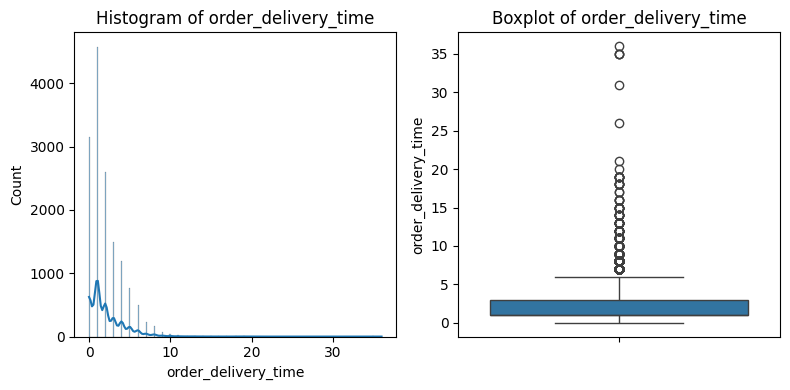

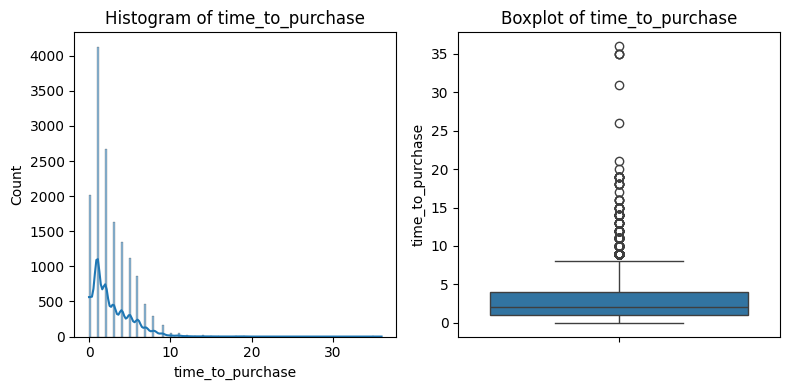

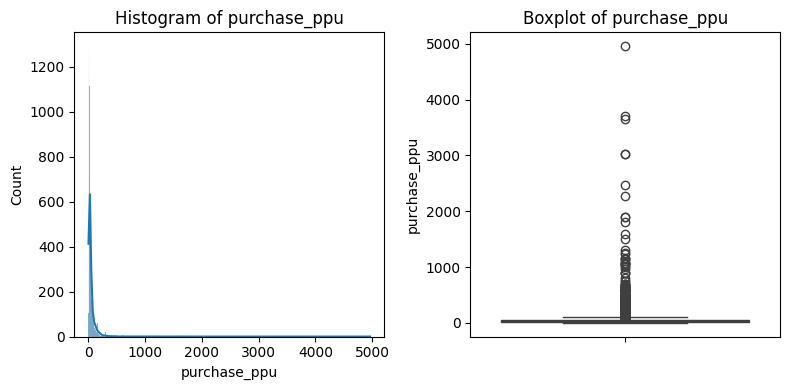

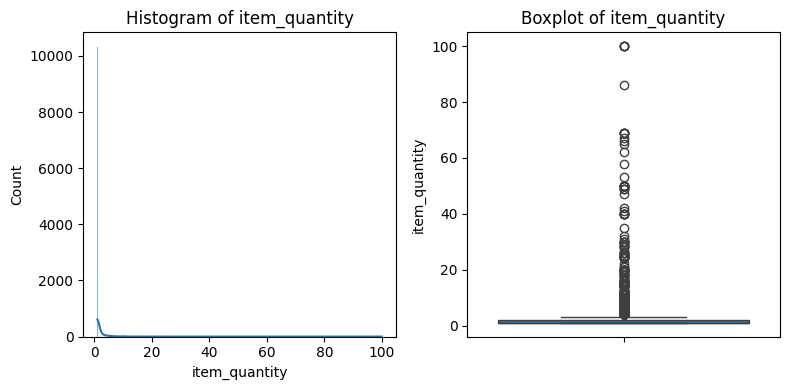

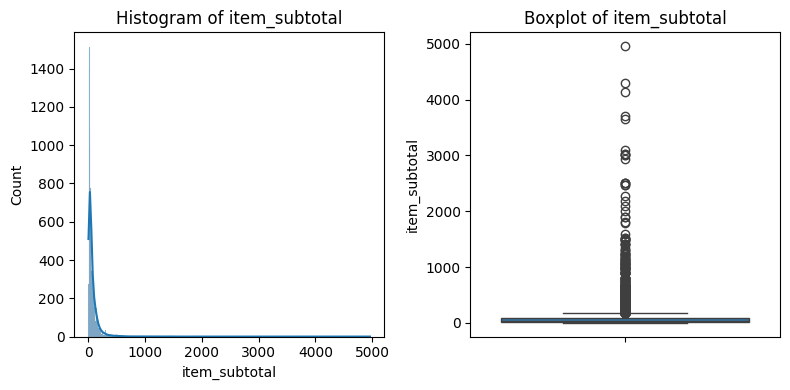

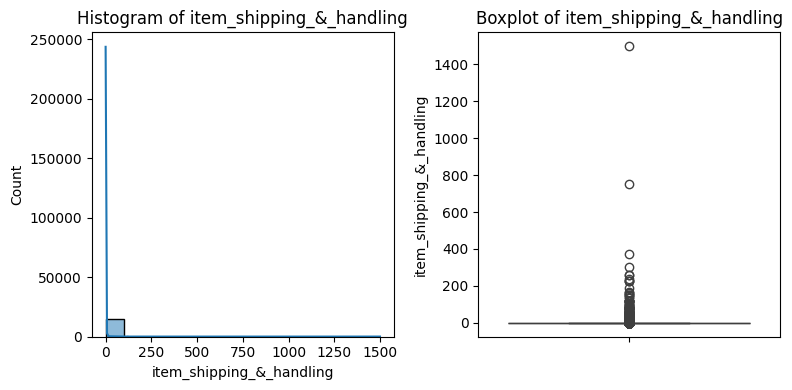

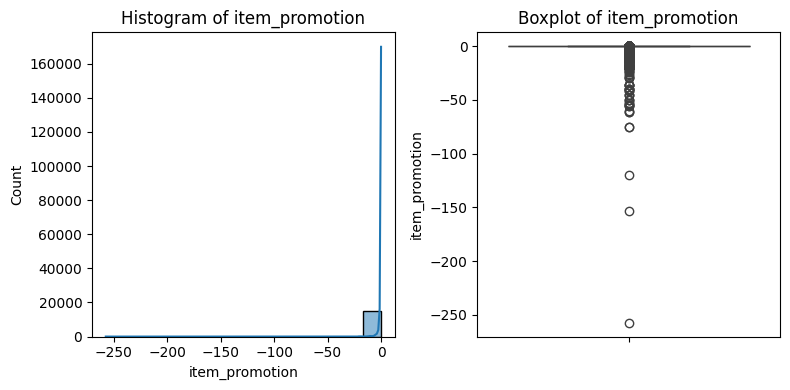

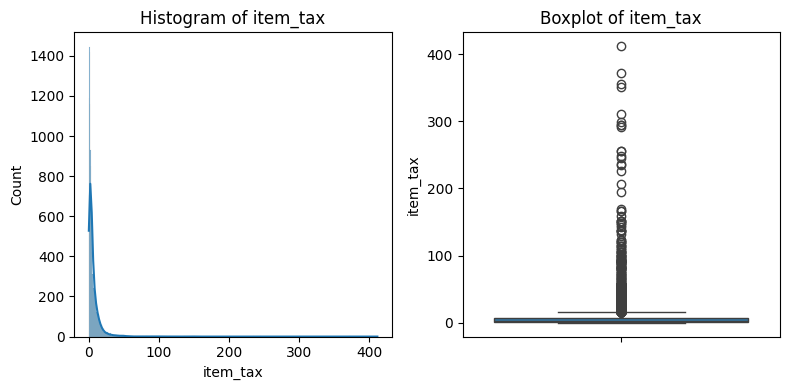

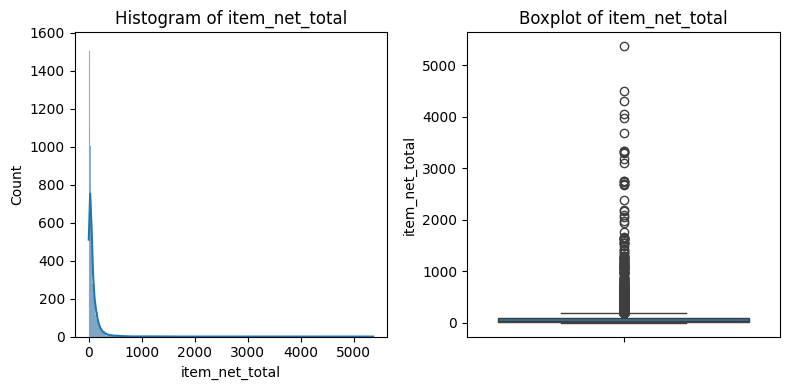

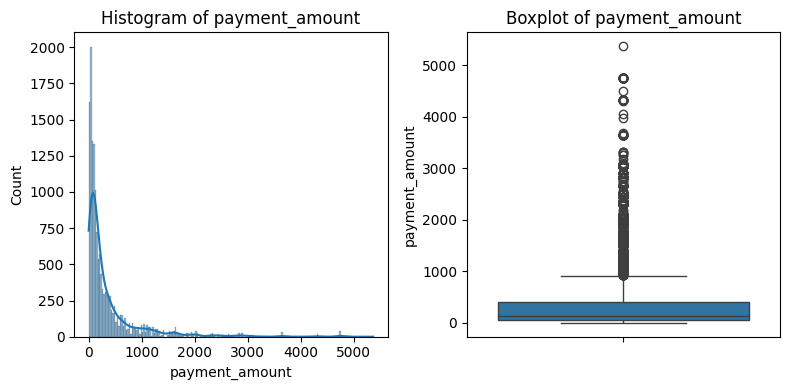

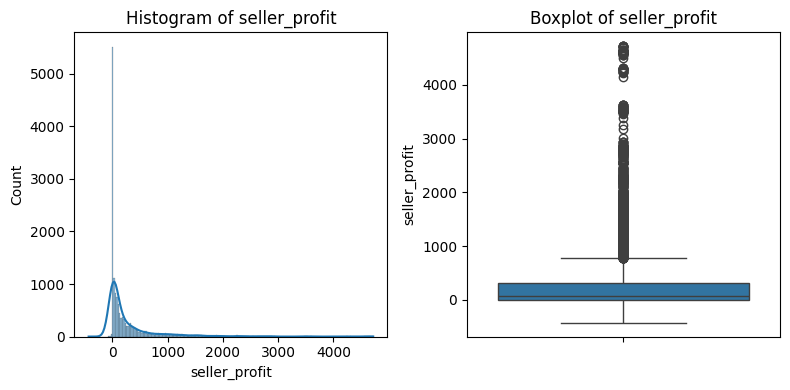

In [15]:
# Iterate over each numerical column in the DataFrame
for col in df.select_dtypes(include="number").columns:
    # Create a new figure with specified dimensions
    plt.figure(figsize=(8, 4))
    
    # Create a subplot for the histogram
    plt.subplot(1, 2, 1)
    # Plot a histogram with KDE (Kernel Density Estimate) for the current numerical column
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    
    # Create a subplot for the boxplot
    plt.subplot(1, 2, 2)
    # Plot a boxplot for the current numerical column
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    
    # Adjust layout to prevent overlap of plots
    plt.tight_layout()
    
    # Display the plots
    plt.show()


value_counts for order_day :
 order_day
Wednesday    3494
Monday       3367
Tuesday      3366
Friday       2274
Thursday     2206
Sunday        111
Saturday       80
Name: count, dtype: int64


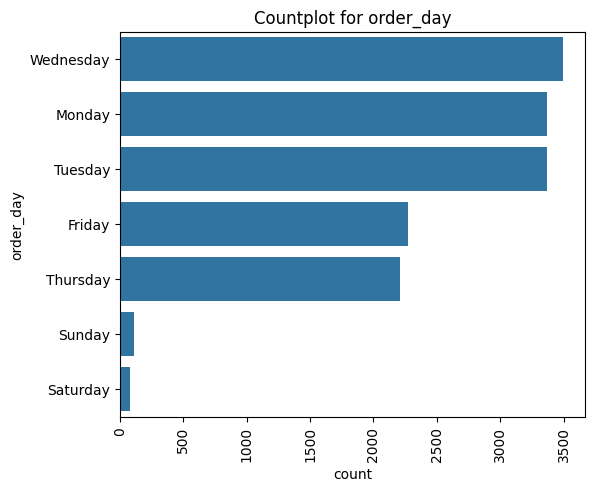

value_counts for product_category :
 product_category
Home Improvement                                     1311
Kitchen                                              1263
Office Product                                       1255
Health and Beauty                                    1221
Baby Product                                         1216
Business, Industrial, & Scientific Supplies Basic     879
Home                                                  784
Wireless                                              651
Apparel                                               624
Sports                                                612
CE                                                    610
Book                                                  571
Grocery                                               488
Beauty                                                477
Personal Computer                                     412
Furniture                                             409
Toy               

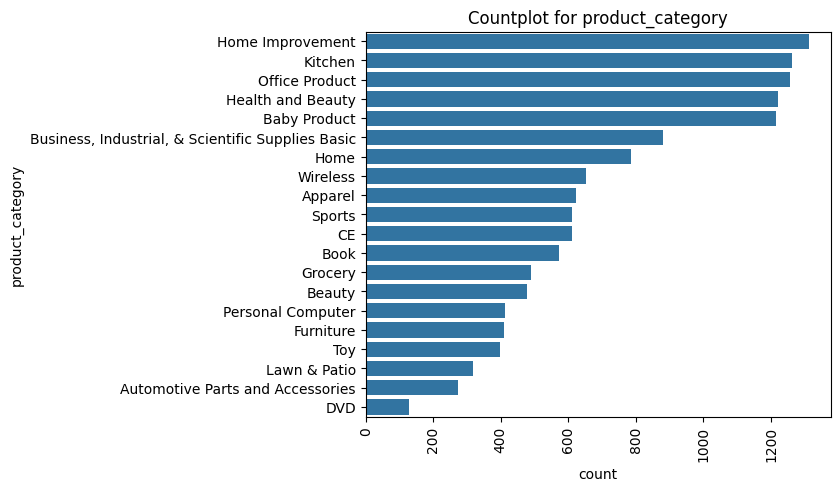

value_counts for brand :
 brand
Amazon Basics     285
Graco             240
0                 224
TracFone          132
Mama Bear         131
Logitech          106
Safety 1st        101
Linenspa           97
Pampers            96
HUGGIES            91
Amazon             79
Delta Children     77
Kidde              72
Dream On Me        72
Vaultz             70
Zinus              62
Generic            57
Baby Trend         55
Regalo             53
Amerex             52
Name: count, dtype: int64


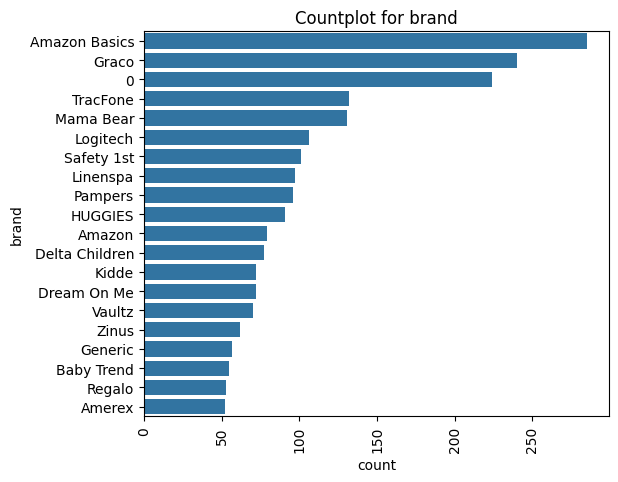

value_counts for manufacturer :
 manufacturer
0                           796
Amazon                      252
Procter & Gamble            178
Amazon.com Services LLC.    171
Kimberly-Clark Corp.        118
Logitech                    104
Dorel Juvenile Group-CA      96
3M                           93
Graco                        84
MOTOROLA INC                 77
Unilever                     73
Kidde                        65
GRACO                        64
Linenspa                     61
Amazon.com Services, LLC     58
Zinus                        54
Apple                        48
Regalo                       47
Anker                        45
SAMSUNG                      43
Name: count, dtype: int64


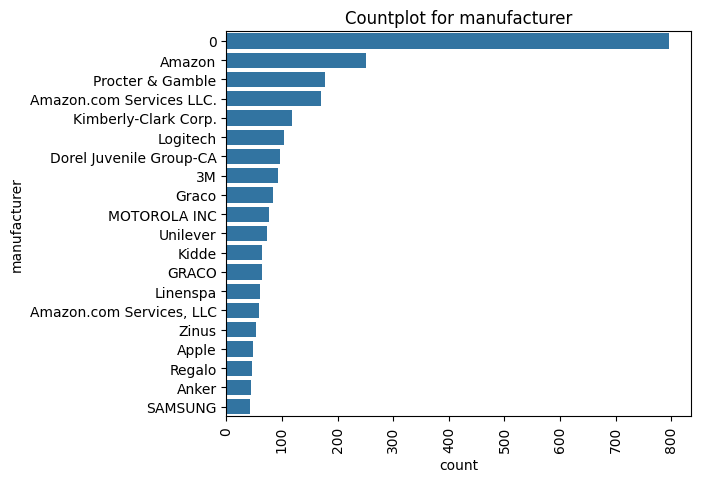

value_counts for seller_name :
 seller_name
Amazon                                               6134
ISCP - Makers of Vaultz, Snap-N-Store and Find It      62
Utopia Deals                                           48
AnkerDirect                                            47
Tracfone Wireless Inc.                                 43
GLOSEN                                                 39
GTlight                                                31
Pro-Distributing                                       29
alwayz-on-sale                                         29
Bedsure                                                26
Pamo Babe                                              25
Biloban                                                24
Market global                                          23
Wapa                                                   20
M2 BRANDS                                              20
smooshie                                               20
Spreetail                   

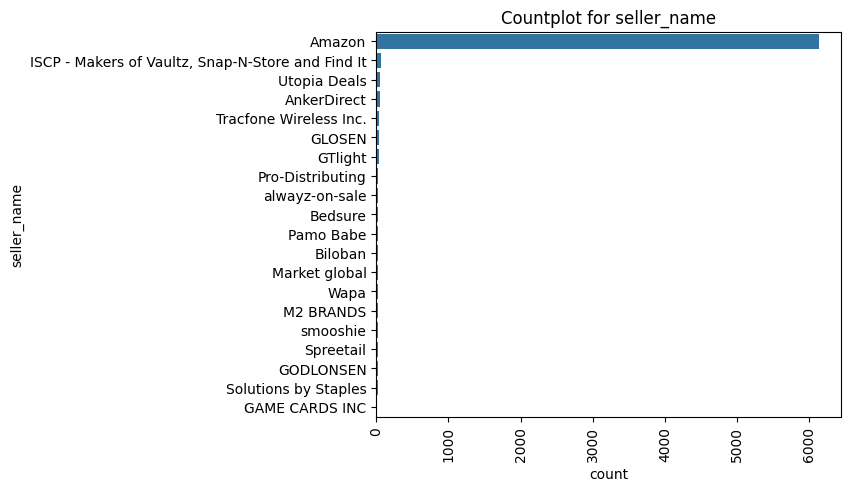

In [16]:
# Iterate over each categorical column in the DataFrame
for col in df.select_dtypes(include="O").columns:
    # Print the value counts for the current categorical column, showing the top 20 most frequent values
    print(f"value_counts for {col} :\n", df[col].value_counts().head(20))

    # Create a new figure for the countplot
    plt.figure(figsize=(6, 5))
    
    # Create a countplot for the current categorical column, limiting to the top 20 most frequent categories
    sns.countplot(y=df[col], order=df[col].value_counts().index[:20])
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)
    
    # Set the title for the plot
    plt.title(f'Countplot for {col}')
    
    # Display the plot
    plt.show()

### *Bi-Variate Analysis

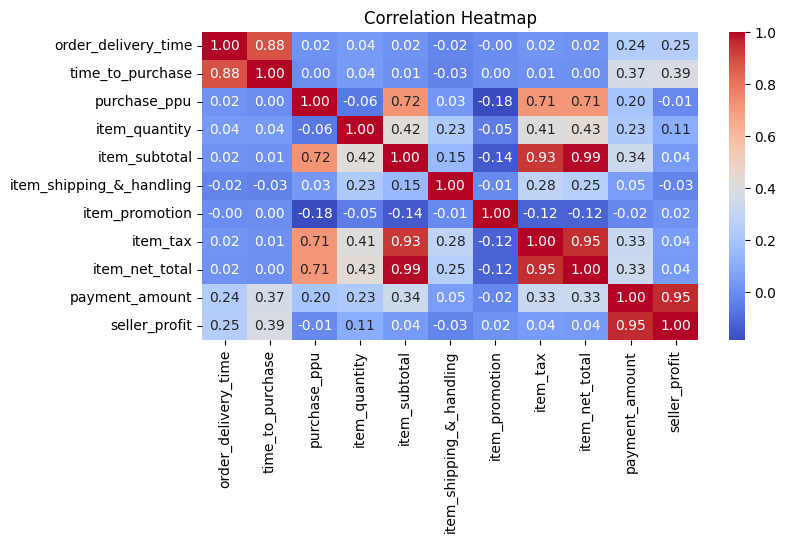

In [17]:
# Create a new figure with specified dimensions
plt.figure(figsize=(8, 4))

# Generate a heatmap to visualize the correlation matrix of numerical columns
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, fmt='.2f', cmap='coolwarm')

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

### * Multi-Variate Analysis

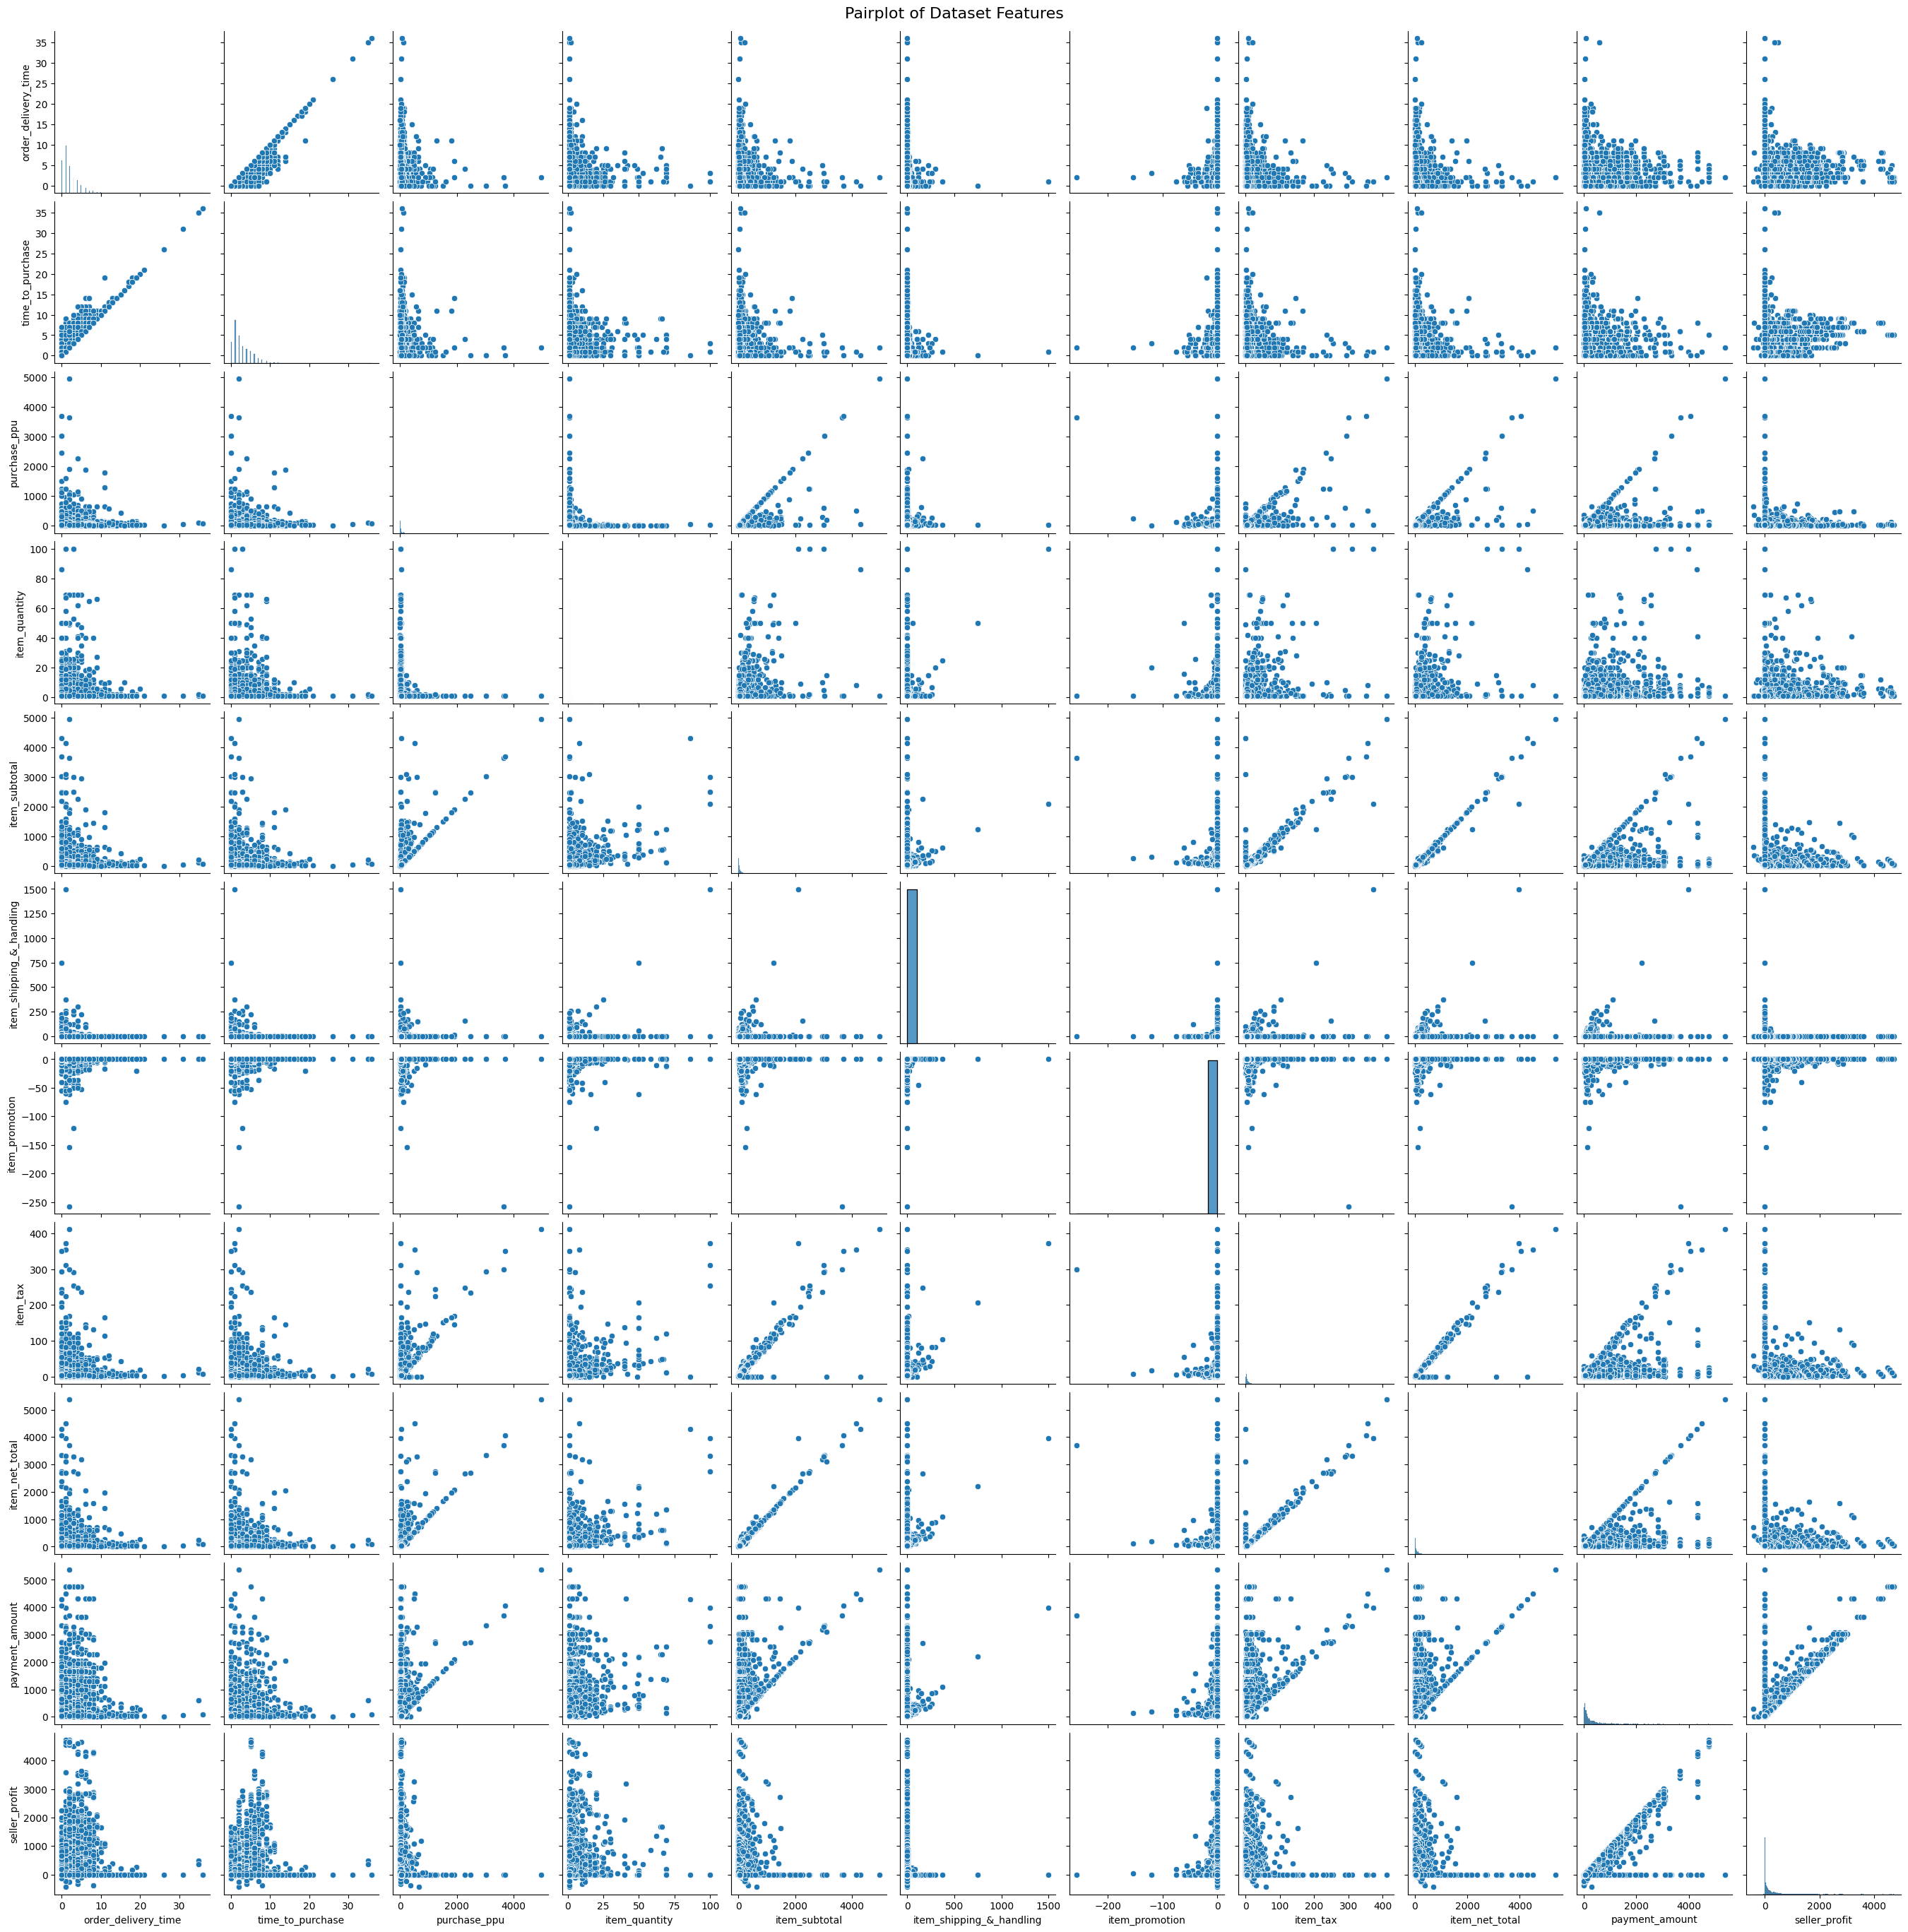

In [18]:
# Generate a pairplot to visualize pairwise relationships in the dataset
sns.pairplot(df)

# Set the title for the pairplot, adjusting the position and font size
plt.suptitle('Pairplot of Dataset Features', y=1, fontsize=16)

# Display the pairplot
plt.show()

### Business Question

1) What are the best-selling product categories and brands?

                                     product_category  item_net_total
0                                        Baby Product       106210.06
1                                    Home Improvement       105232.28
2                                             Kitchen       105207.94
3                                            Wireless       100367.57
4                                              Sports        73397.89
5                                   Health and Beauty        72444.61
6                                      Office Product        67218.67
7                                           Furniture        66587.82
8   Business, Industrial, & Scientific Supplies Basic        63938.56
9                                                  CE        62393.42
10                                               Home        54363.48
11                                  Personal Computer        44639.85
12                                             Beauty        33259.88
13                  

C:\Users\minas\AppData\Local\Temp\ipykernel_23792\3691400665.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_category, x='item_net_total', y='product_category', palette='viridis')


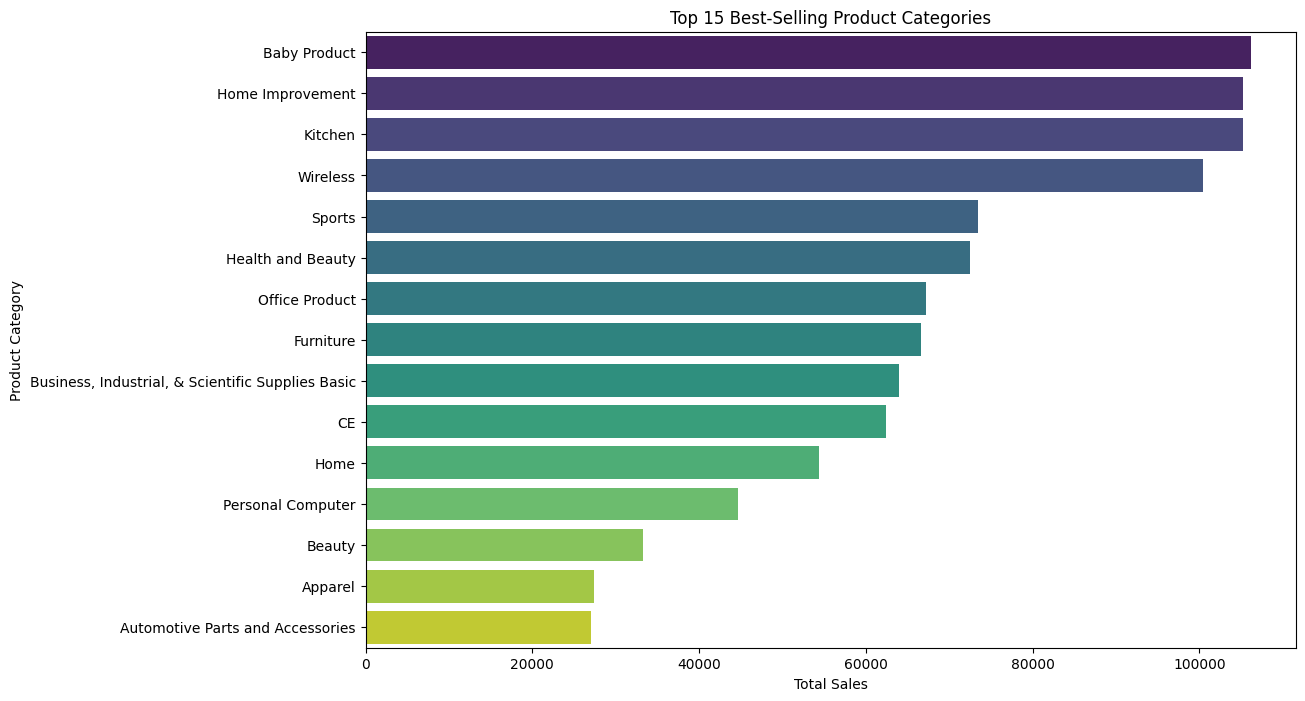

               brand  item_net_total
0           TracFone        37145.98
1              Graco        31098.52
2              Apple        23678.92
3             Amazon        13567.54
4              Canon        12367.27
5               Poly        11704.19
6           Linenspa        11223.01
7                  0        10918.31
8            SAMSUNG        10601.31
9     total wireless         9687.89
10     Amazon Basics         9652.01
11           Pampers         9199.71
12        Safety 1st         8959.23
13          Logitech         8212.22
14  MUSTANG SURVIVAL         8144.45


C:\Users\minas\AppData\Local\Temp\ipykernel_23792\3691400665.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_brand, x='item_net_total', y='brand', palette='viridis')


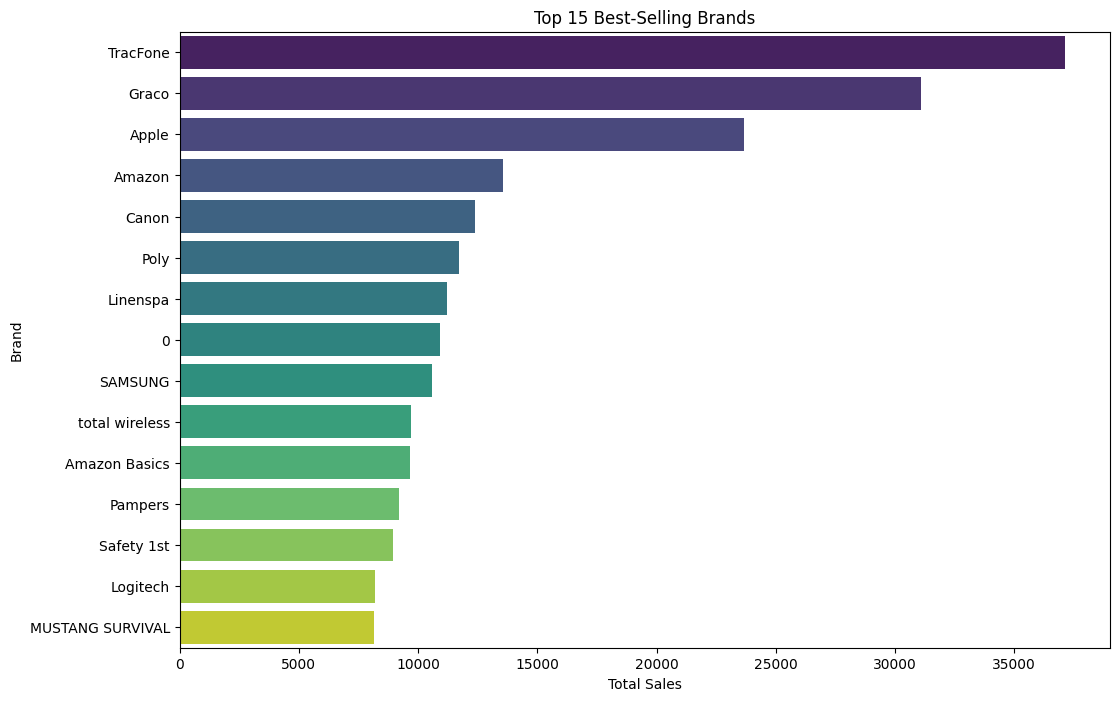

In [19]:
# Aggregate total sales by product category and sort to get the top 15 categories
sales_by_category = df.groupby('product_category')['item_net_total'].sum().nlargest(15).reset_index()

# Aggregate total sales by brand and sort to get the top 15 brands
sales_by_brand = df.groupby('brand')['item_net_total'].sum().nlargest(15).reset_index()

# Print the top 15 best-selling product categories
print(sales_by_category)

# Create a horizontal bar plot for the top 15 best-selling product categories
plt.figure(figsize=(12, 8))
sns.barplot(data=sales_by_category, x='item_net_total', y='product_category', palette='viridis')
plt.title('Top 15 Best-Selling Product Categories')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.show()

# Print the top 15 best-selling brands
print(sales_by_brand)

# Create a horizontal bar plot for the top 15 best-selling brands
plt.figure(figsize=(12, 8))
sns.barplot(data=sales_by_brand, x='item_net_total', y='brand', palette='viridis')
plt.title('Top 15 Best-Selling Brands')
plt.xlabel('Total Sales')
plt.ylabel('Brand')
plt.show()

2) How does seller profit vary across different product categories?

                                     product_category  total_profit  \
0                                        Baby Product     899397.43   
1                                   Health and Beauty     576413.24   
2                                    Home Improvement     301390.21   
3                                             Kitchen     300537.38   
4                                              Beauty     281166.00   
5                                              Sports     212699.44   
6                                                Home     207883.29   
7                                            Wireless     194554.35   
8   Business, Industrial, & Scientific Supplies Basic     180938.76   
9                                      Office Product     173478.09   
10                                            Grocery     157816.70   
11                                            Apparel     103408.36   
12                                          Furniture      86419.15   
13    

C:\Users\minas\AppData\Local\Temp\ipykernel_23792\2712682789.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profit_by_category.head(15), y='product_category', x='total_profit', palette="magma")


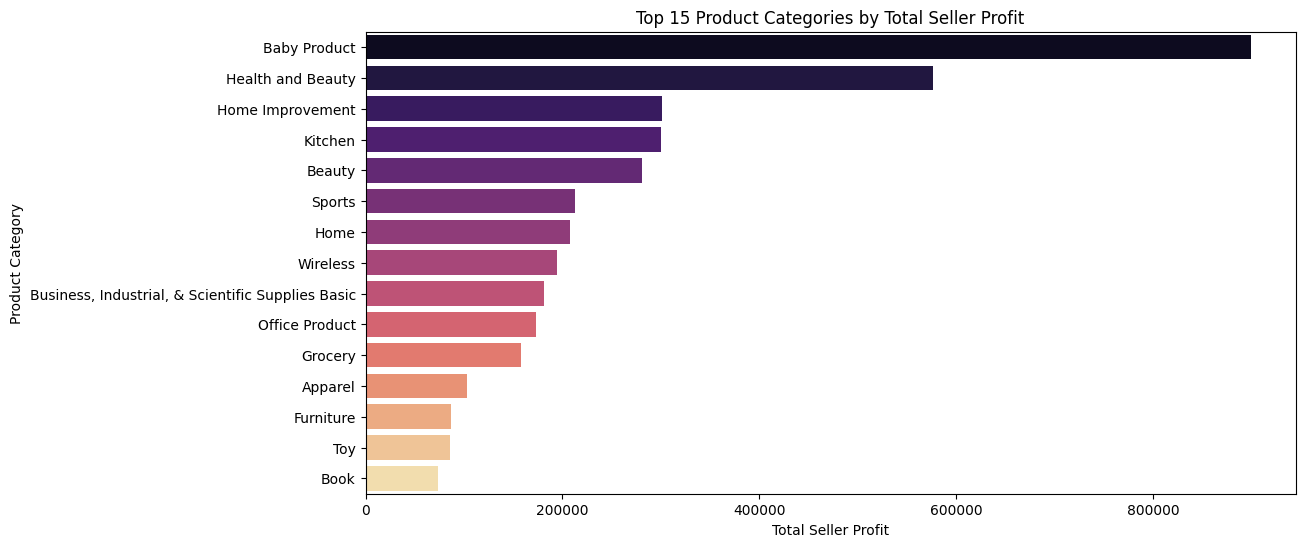

C:\Users\minas\AppData\Local\Temp\ipykernel_23792\2712682789.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profit_by_category, y='product_category', x='item_count', palette="plasma")


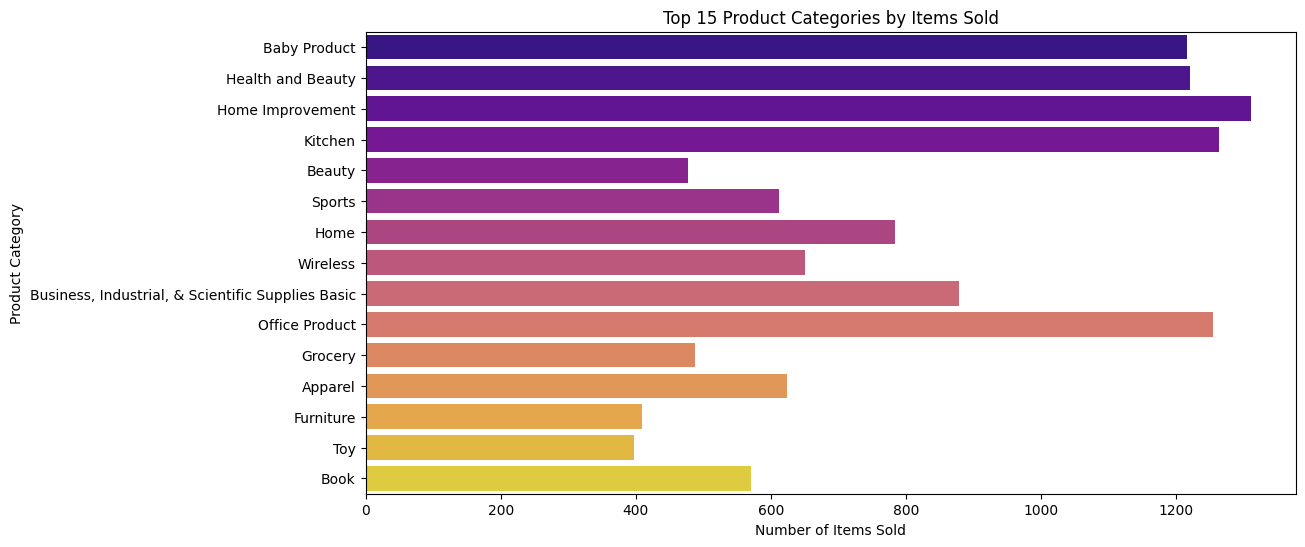

In [20]:
# Aggregate total seller profit and count of items sold by product category
profit_by_category = df.groupby('product_category').agg(
    total_profit=('seller_profit', 'sum'),  # Total seller profit per category
    item_count=('seller_profit', 'size')  # Number of items sold
).nlargest(15,'total_profit').reset_index()

# Display the aggregated data
print(profit_by_category)  # Display top 15 categories by total profit

# Visualization of Total Seller Profit by Product Category
plt.figure(figsize=(12, 6))
sns.barplot(data=profit_by_category.head(15), y='product_category', x='total_profit', palette="magma")
plt.title('Top 15 Product Categories by Total Seller Profit')
plt.xlabel('Total Seller Profit')
plt.ylabel('Product Category')
plt.show()


# Visualization of Item Count by Product Category
plt.figure(figsize=(12, 6))
sns.barplot(data=profit_by_category, y='product_category', x='item_count', palette="plasma")
plt.title('Top 15 Product Categories by Items Sold')
plt.xlabel('Number of Items Sold')
plt.ylabel('Product Category')
plt.show()


3) How does purchase PPU influence seller profit across different product category?

product_category
Home Improvement        1311
Kitchen                 1263
Office Product          1255
Health and Beauty       1221
Baby Product            1216
                        ... 
Download Sports            1
Art                        1
Portable Audio Video       1
Target Gift Card           1
Office Electronics         1
Name: count, Length: 63, dtype: int64 

purchase_ppu  seller_profit  product_category 
11.25         583.68         Grocery              25
6.99          0.00           Toy                  20
55.72         2536.76        Grocery              18
14.15         730.38         Personal Computer    16
99.95         0.00           Health and Beauty    13
                                                  ..
16.82         515.24         Wireless              1
              1497.94        Beauty                1
16.83         407.56         Beauty                1
16.84         190.49         Toy                   1
4960.00       0.00           Furniture         

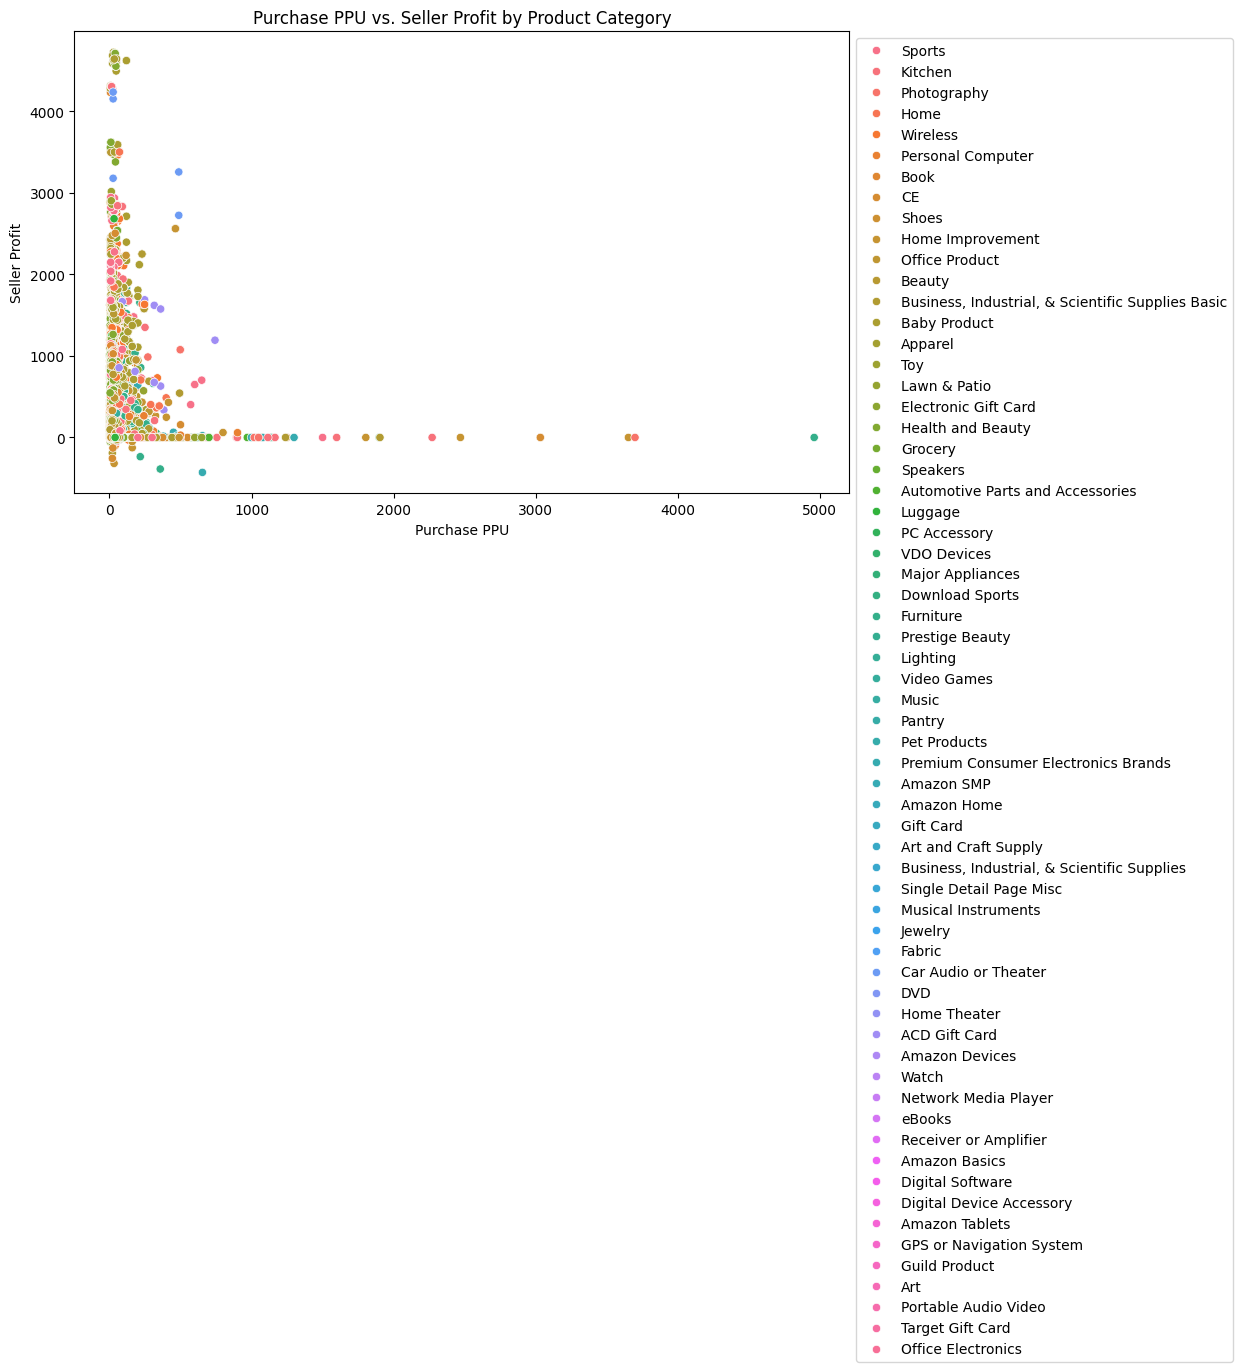

In [21]:
# Display the count of each product category
print(df['product_category'].value_counts(), "\n")

# Display the count of combinations between purchase_ppu, seller_profit, and product_category
print(df[['purchase_ppu', 'seller_profit', 'product_category']].value_counts())

# Create a scatter plot to visualize the influence of purchase PPU on seller profit across different product categories
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='purchase_ppu', y='seller_profit', hue='product_category')
plt.title('Purchase PPU vs. Seller Profit by Product Category')
plt.xlabel('Purchase PPU')
plt.ylabel('Seller Profit')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

4) How does item tax vary across different product categories?

                                             median_item_tax
product_category                                            
Receiver or Amplifier                                 26.630
Digital Software                                      22.540
Amazon Devices                                        19.320
Premium Consumer Electronics Brands                   16.020
Car Audio or Theater                                  13.800
Home Theater                                          13.720
Amazon Tablets                                        11.945
Furniture                                             10.440
VDO Devices                                            8.100
Major Appliances                                       6.680
Baby Product                                           6.470
PC Accessory                                           6.200
Network Media Player                                   5.885
Business, Industrial, & Scientific Supplies            5.680
Photography             

C:\Users\minas\AppData\Local\Temp\ipykernel_23792\4285543886.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, y='product_category', x='item_tax',


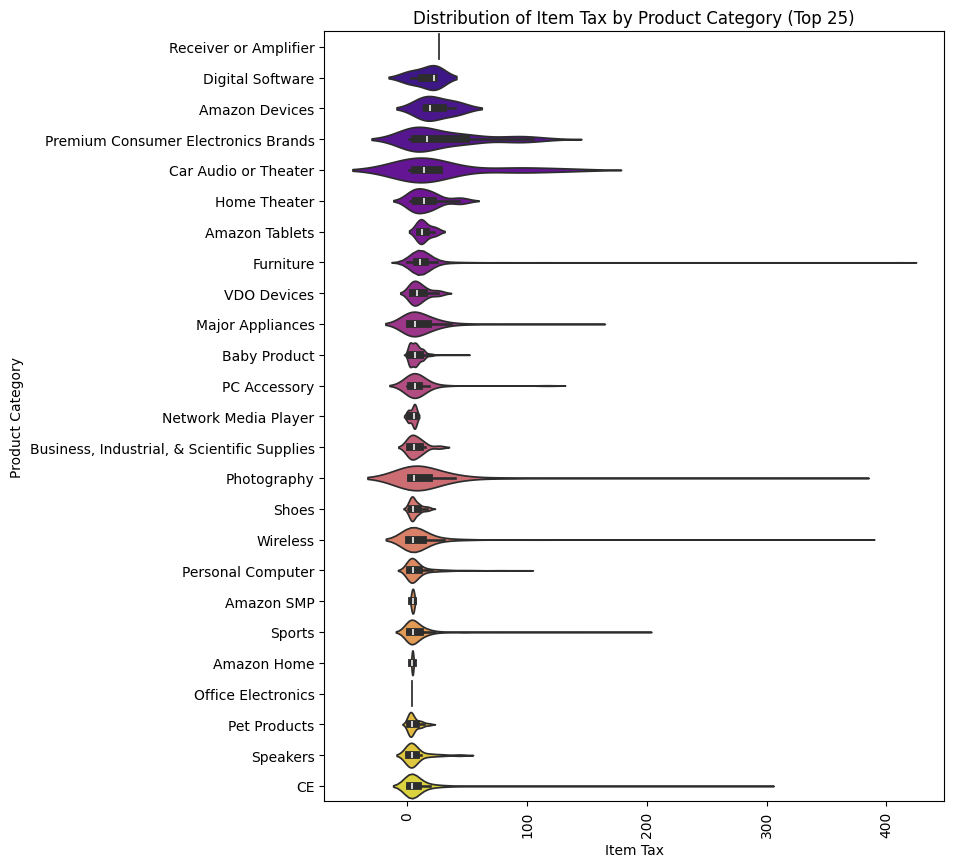

In [22]:
# Calculate median item tax for each product category
tax_stats_by_category = df.groupby('product_category').agg(
    median_item_tax=('item_tax', 'median')
).nlargest(25,'median_item_tax')

# Display the top 25 product categories by median item tax
print(tax_stats_by_category)

# Create a violin plot to show the density of item tax for better visualization of distributions
plt.figure(figsize=(8, 10))
sns.violinplot(data=df, y='product_category', x='item_tax',
               order=tax_stats_by_category.index, palette="plasma")
plt.title('Distribution of Item Tax by Product Category (Top 25)')
plt.xlabel('Item Tax')
plt.ylabel('Product Category')
plt.xticks(rotation=90)
plt.show()

5) How do item shipping & handling costs vary across different manufacturers ?

manufacturer
TeqHome                     258.93
T TORY CARRIER              258.00
DUNTRKDU                    239.00
Majnesvon                   189.00
AdirMed                     160.86
ADORNEVE                    159.98
VONZOY                      149.99
SUXXAN                      119.98
TTSITG                       99.99
Bellemavema                  99.00
Turnkey                      98.00
OUTROAD                      89.99
GNIXUU                       89.99
US Feed Processing Mill      84.24
Muames                       79.99
Anyhave                      79.99
Raybee                       79.99
Gustonhon                    79.00
VilroCaz                     78.80
Harper & Bright Designss     74.99
Vabches                      69.99
ONENICE                      69.98
Zoomster                     60.00
MIIIKO                       59.99
BestMassage                  59.98
Name: item_shipping_&_handling, dtype: float64


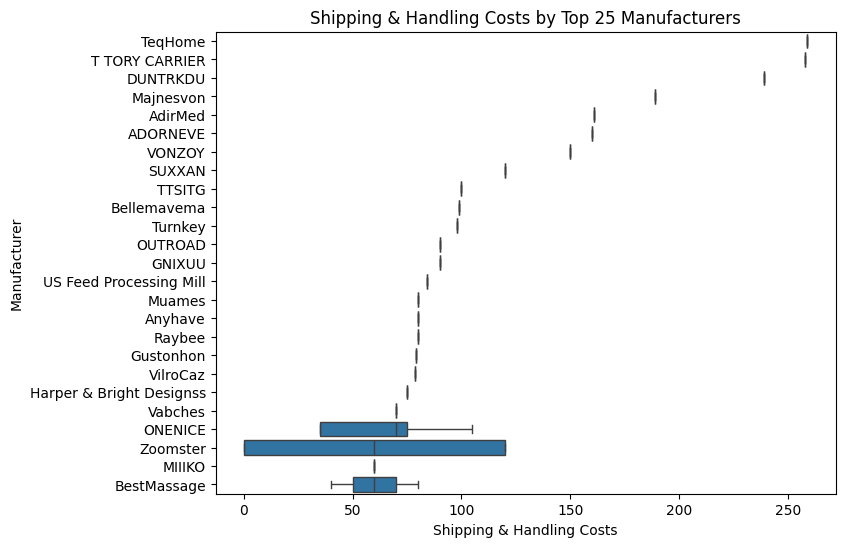

In [23]:
# Get the top 25 manufacturers based on median shipping & handling costs
top_manufacturers = df.groupby('manufacturer')['item_shipping_&_handling'].median().sort_values(ascending=False).head(25).index
print(df.groupby('manufacturer')['item_shipping_&_handling'].median().sort_values(ascending=False).head(25))

# Plot the boxplot for shipping & handling costs by manufacturer
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[df['manufacturer'].isin(top_manufacturers)], y='manufacturer', x='item_shipping_&_handling', order=top_manufacturers)
plt.title('Shipping & Handling Costs by Top 25 Manufacturers')
plt.xlabel('Shipping & Handling Costs')
plt.ylabel('Manufacturer')
plt.show()


6) What is the relationship between item tax and payment amount across different product categories?

                       product_category  avg_item_tax  avg_payment_amount
0   Premium Consumer Electronics Brands     31.579111          426.629111
1                  Car Audio or Theater     30.172667         1547.002000
2                 Receiver or Amplifier     26.630000          285.180000
3                        Amazon Devices     24.120000          274.103333
4                           Photography     17.522530          415.281325
..                                  ...           ...                 ...
58                        Amazon Basics      0.680000          400.932000
59                     Target Gift Card      0.000000         3104.250000
60                            Gift Card      0.000000          354.575000
61                 Electronic Gift Card      0.000000          377.857143
62                        ACD Gift Card      0.000000         1370.454545

[63 rows x 3 columns]


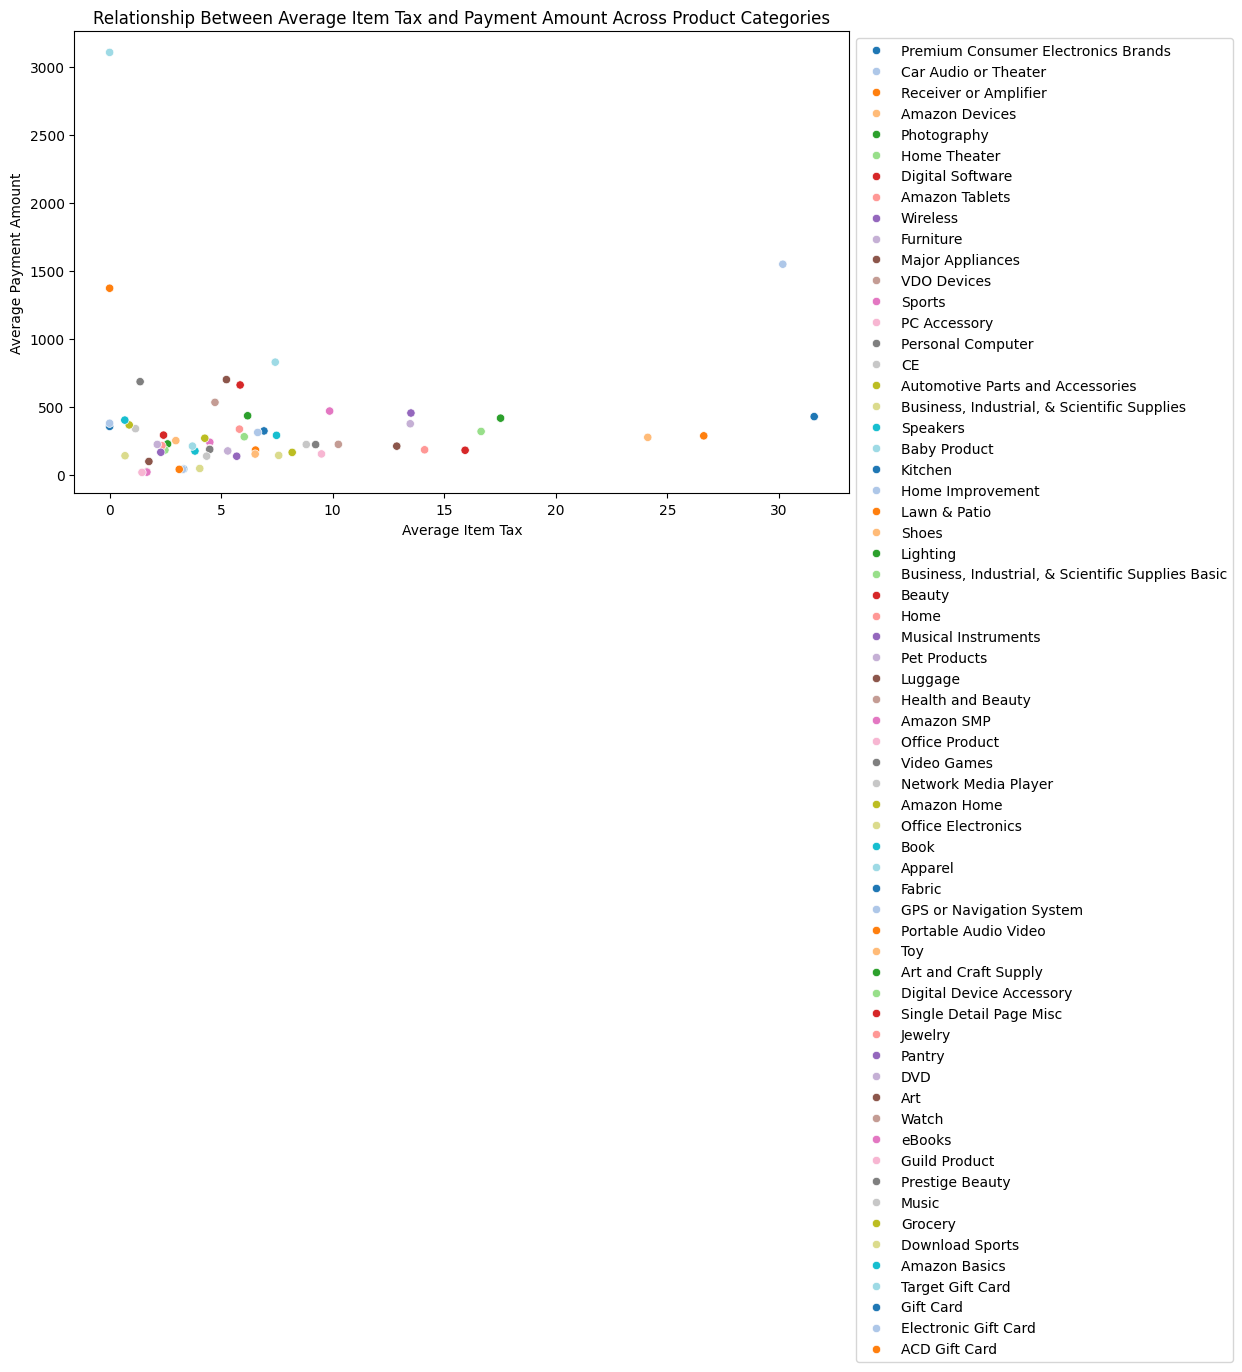

In [24]:
# Group by product category and calculate mean item tax and mean payment amount
tax_payment_by_category = df.groupby('product_category').agg(
    avg_item_tax=('item_tax', 'mean'),
    avg_payment_amount=('payment_amount', 'mean')
).sort_values(by='avg_item_tax', ascending=False).reset_index()

# Print the average item tax and payment amount for each product category
print(tax_payment_by_category)

# Create a scatterplot to visualize the relationship between item tax and payment amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tax_payment_by_category, x='avg_item_tax', y='avg_payment_amount', hue='product_category', palette='tab20')
plt.title('Relationship Between Average Item Tax and Payment Amount Across Product Categories')
plt.xlabel('Average Item Tax')
plt.ylabel('Average Payment Amount')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

7) How does order delivery time vary across different product categories and brands?

product_category
Receiver or Amplifier                          4.0
Amazon Basics                                  4.0
Pantry                                         3.0
Art                                            3.0
Car Audio or Theater                           3.0
Baby Product                                   3.0
Home                                           2.0
Furniture                                      2.0
Health and Beauty                              2.0
Luggage                                        2.0
DVD                                            2.0
Premium Consumer Electronics Brands            2.0
Office Electronics                             2.0
Beauty                                         2.0
Shoes                                          2.0
Single Detail Page Misc                        2.0
Jewelry                                        2.0
Kitchen                                        2.0
Amazon Tablets                                 1.5
Watch         

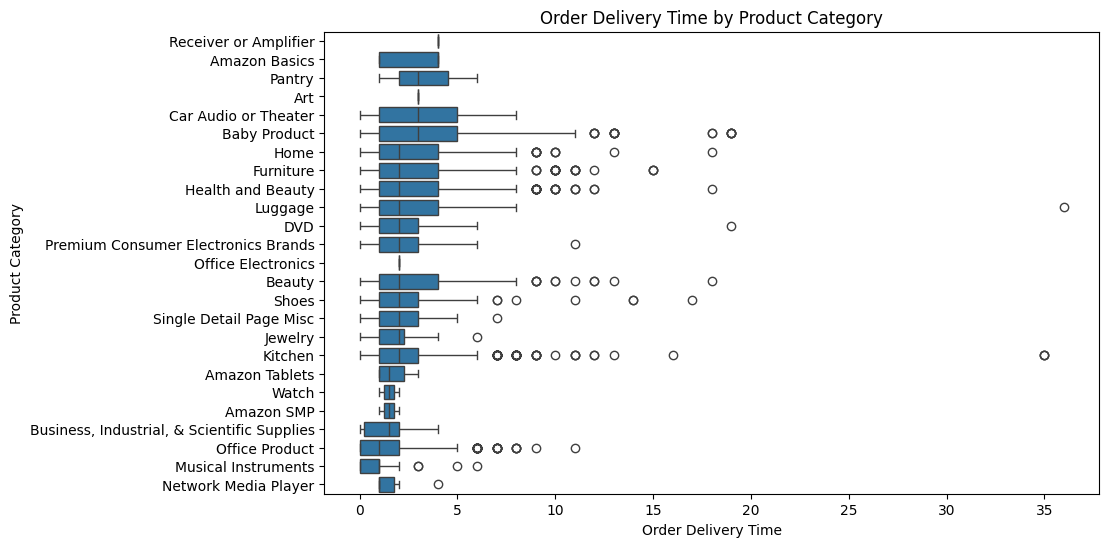

brand
1st Place Products       36.0
Milliard                 35.0
JD Jack N'Drill          21.0
QCAA                     19.0
RAW SUGAR                18.0
adidas Originals         17.0
Marine Bolt Supply       16.0
BNX                      15.0
NEOTRIL                  14.5
Sunnyside Corporation    14.0
Vriccc                   14.0
ASICS                    14.0
Kenmore                  13.5
JennyM                   13.0
Kubota                   13.0
MUZXQII                  13.0
SUNTRSI                  12.0
DELIQO                   12.0
LITTLE RAWR              12.0
Beimu                    11.0
BOGS                     11.0
Big Ass Fans             11.0
BooYah Clean             11.0
Glocusent                11.0
SIHAIAN                  11.0
Name: order_delivery_time, dtype: float64


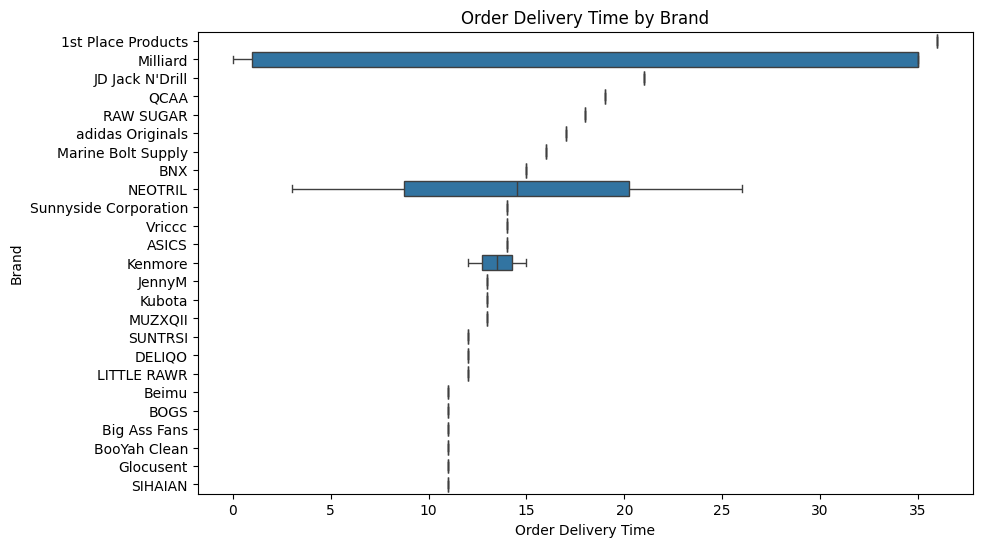

In [25]:
# Box plot of delivery time by product category
top_25_categories = df.groupby('product_category')['order_delivery_time'].median().sort_values(ascending=False).head(25)
print(top_25_categories)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='product_category', x='order_delivery_time',
             order=top_25_categories.index)
plt.title('Order Delivery Time by Product Category')
plt.xlabel('Order Delivery Time')
plt.ylabel('Product Category')
plt.show()

# Box plot of delivery time by brand
top_25_brands = df.groupby('brand')['order_delivery_time'].median().sort_values(ascending=False).head(25)
print(top_25_brands)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='brand', x='order_delivery_time',
             order=top_25_brands.index)
plt.title('Order Delivery Time by Brand')
plt.xlabel('Order Delivery Time')
plt.ylabel('Brand')
plt.show()

8) How do sales trends vary by day of the week?

   order_day  item_net_total
0  Wednesday       281009.86
1     Monday       272554.13
2    Tuesday       270916.13
3   Thursday       192264.56
4     Friday       183552.10
5     Sunday         9575.81
6   Saturday         4424.31


C:\Users\minas\AppData\Local\Temp\ipykernel_23792\2082945445.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_day, x='order_day', y='item_net_total', palette='viridis')


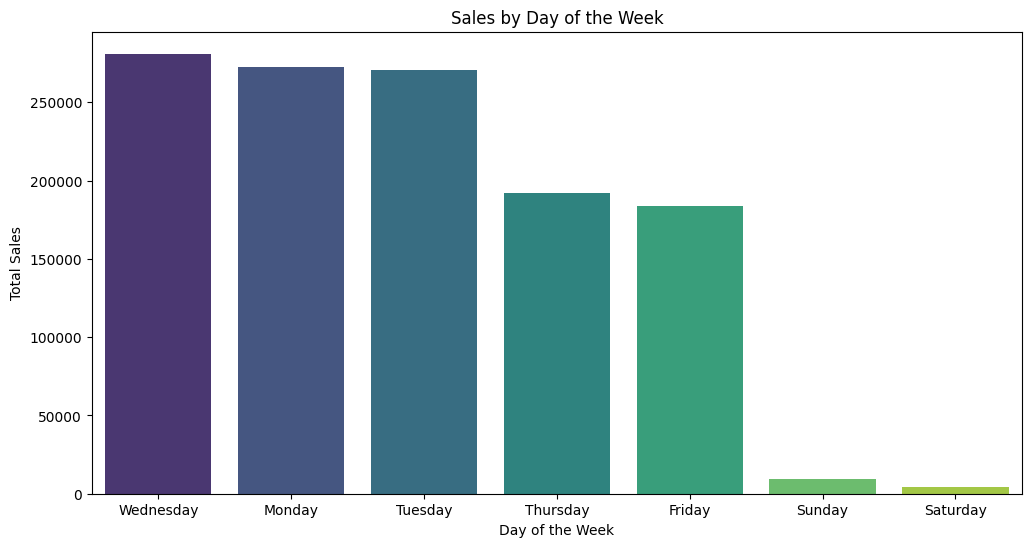

In [26]:
# Aggregate sales by day of week
sales_by_day = df.groupby('order_day')['item_net_total'].sum().sort_values(ascending=False).reset_index()
print(sales_by_day)

# Plot sales by day of week
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_day, x='order_day', y='item_net_total', palette='viridis')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

9) How does the total number of items sold vary across different days of the week over time?

   order_date  order_day  item_quantity
0  2024-07-01     Monday           1569
1  2024-07-02    Tuesday           1571
2  2024-07-03  Wednesday           1635
3  2024-07-04   Thursday             15
4  2024-07-05     Friday            748
5  2024-07-06   Saturday             16
6  2024-07-07     Sunday             27
7  2024-07-08     Monday           1100
8  2024-07-09    Tuesday           1308
9  2024-07-10  Wednesday           1341
10 2024-07-11   Thursday           1378
11 2024-07-12     Friday           1266
12 2024-07-13   Saturday             36
13 2024-07-14     Sunday             35
14 2024-07-15     Monday            869
15 2024-07-16    Tuesday           1070
16 2024-07-17  Wednesday           1335
17 2024-07-18   Thursday           1281
18 2024-07-19     Friday            841
19 2024-07-20   Saturday             41
20 2024-07-21     Sunday             74
21 2024-07-22     Monday           1150
22 2024-07-23    Tuesday            819
23 2024-07-24  Wednesday           1495


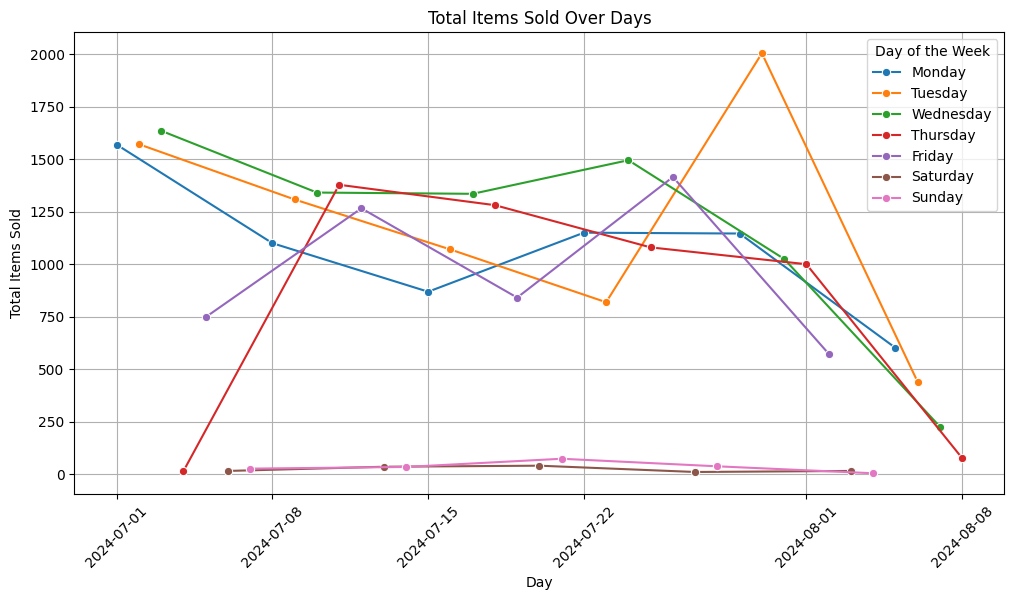

In [27]:
# Group by day and calculate total items sold
sales_by_day = df.groupby(['order_date', 'order_day'])['item_quantity'].sum().reset_index()
print(sales_by_day)

# Plot trend line of total items sold per day
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_day, x='order_date', y='item_quantity', marker='o', color='b', hue='order_day')
plt.title('Total Items Sold Over Days')
plt.xlabel('Day')
plt.ylabel('Total Items Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Day of the Week', loc='upper right')
plt.show()

10) How does total seller profit vary across different days of the week over time?

   order_date  order_day  seller_profit
0  2024-07-01     Monday      208012.80
1  2024-07-02    Tuesday      222473.79
2  2024-07-03  Wednesday      372993.00
3  2024-07-04   Thursday        1029.42
4  2024-07-05     Friday       92218.37
5  2024-07-06   Saturday         416.62
6  2024-07-07     Sunday         545.86
7  2024-07-08     Monday      194337.66
8  2024-07-09    Tuesday      114481.60
9  2024-07-10  Wednesday      152801.79
10 2024-07-11   Thursday      231916.30
11 2024-07-12     Friday      140599.42
12 2024-07-13   Saturday        1154.40
13 2024-07-14     Sunday         825.02
14 2024-07-15     Monday       81001.19
15 2024-07-16    Tuesday       96035.30
16 2024-07-17  Wednesday      139584.66
17 2024-07-18   Thursday      104116.85
18 2024-07-19     Friday      125419.37
19 2024-07-20   Saturday        7295.87
20 2024-07-21     Sunday        3109.25
21 2024-07-22     Monday      204605.57
22 2024-07-23    Tuesday       68776.79
23 2024-07-24  Wednesday      302276.61


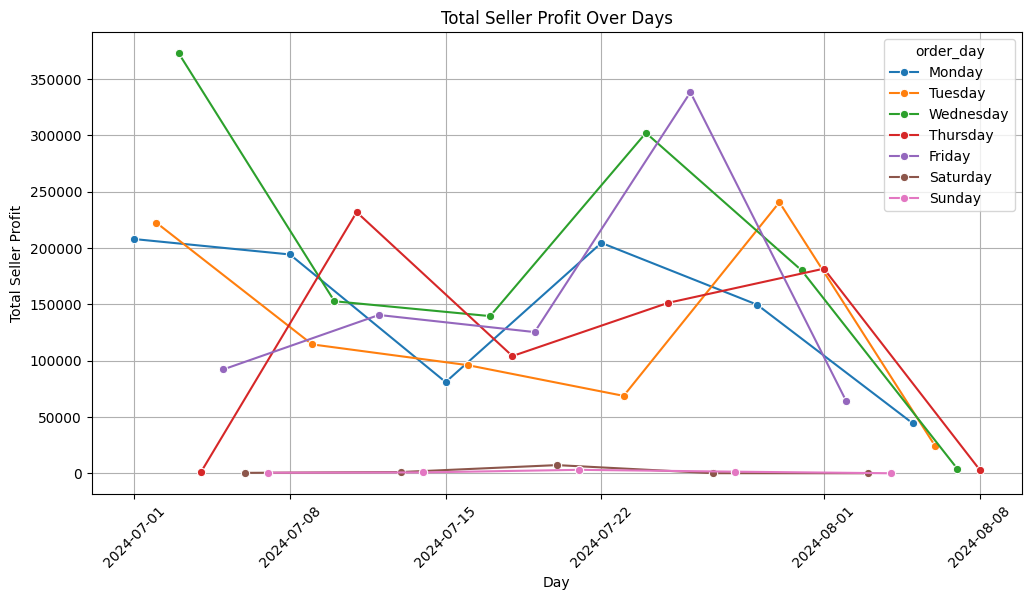

In [28]:
# Group by day and calculate total seller profit
sales_by_day = df.groupby(['order_date', 'order_day'])['seller_profit'].sum().reset_index()
print(sales_by_day)

# Plot trend line of total seller profit per day
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_day, x='order_date', y='seller_profit', marker='o', color='b', hue='order_day')
plt.title('Total Seller Profit Over Days')
plt.xlabel('Day')
plt.ylabel('Total Seller Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

11) How does the time to purchase (time_to_purchase) vary across product categories?

            product_category  time_to_purchase
0       Car Audio or Theater          4.333333
1               Baby Product          4.254934
2                    Luggage          4.159420
3      Receiver or Amplifier          4.000000
4                     Beauty          3.454927
..                       ...               ...
58  Digital Device Accessory          1.000000
59             ACD Gift Card          0.000000
60      Electronic Gift Card          0.000000
61          Digital Software          0.000000
62                    eBooks          0.000000

[63 rows x 2 columns]


C:\Users\minas\AppData\Local\Temp\ipykernel_23792\811647633.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_to_purchase_by_category, y='product_category', x='time_to_purchase', palette="viridis")


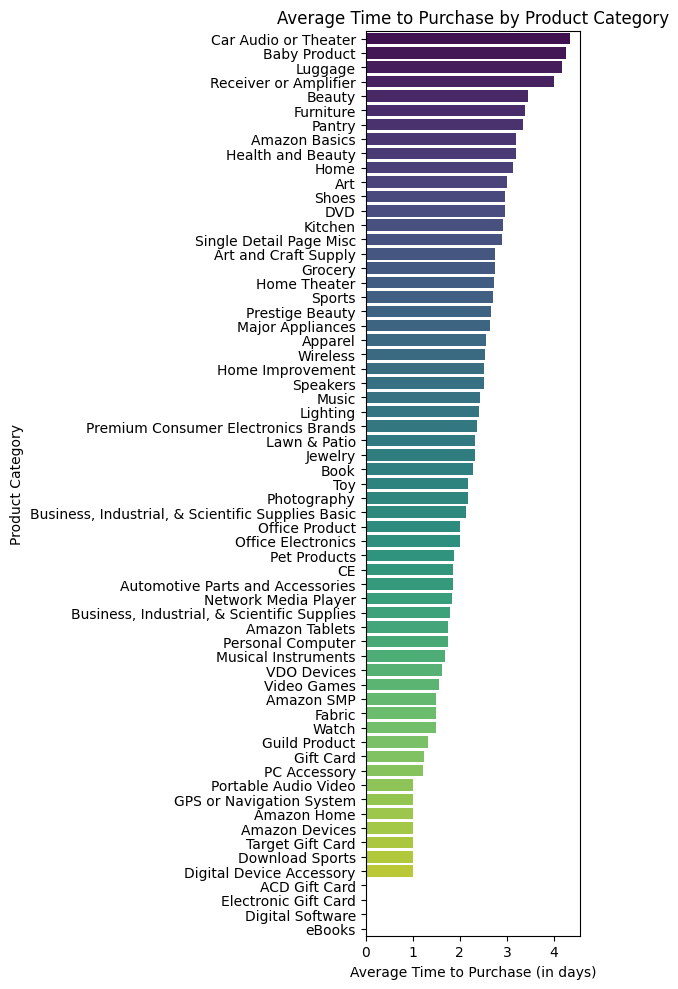

In [29]:
# Group by product_category and calculate mean time_to_purchase
time_to_purchase_by_category = df.groupby('product_category')['time_to_purchase'].mean().reset_index().sort_values(by='time_to_purchase', ascending=False).reset_index(drop=True)
print(time_to_purchase_by_category)

# Plot the barplot
plt.figure(figsize=(6, 10))
sns.barplot(data=time_to_purchase_by_category, y='product_category', x='time_to_purchase', palette="viridis")
plt.title('Average Time to Purchase by Product Category')
plt.xlabel('Average Time to Purchase (in days)')
plt.ylabel('Product Category')
plt.tight_layout()  # Adjust layout to fit the plot elements properly
plt.show()


12) What is the trend of shipping and handling costs over time?

   order_date  item_shipping_&_handling
0  2024-07-01                    178.96
1  2024-07-02                    361.51
2  2024-07-03                   1040.49
3  2024-07-04                      0.00
4  2024-07-05                    547.29
5  2024-07-06                      0.00
6  2024-07-07                      0.00
7  2024-07-08                    318.75
8  2024-07-09                    375.31
9  2024-07-10                    923.04
10 2024-07-11                    504.48
11 2024-07-12                    236.98
12 2024-07-13                      2.99
13 2024-07-14                      0.00
14 2024-07-15                    214.54
15 2024-07-16                    203.28
16 2024-07-17                    368.69
17 2024-07-18                    636.47
18 2024-07-19                    388.72
19 2024-07-20                      0.00
20 2024-07-21                     24.62
21 2024-07-22                    158.22
22 2024-07-23                    406.87
23 2024-07-24                    496.68


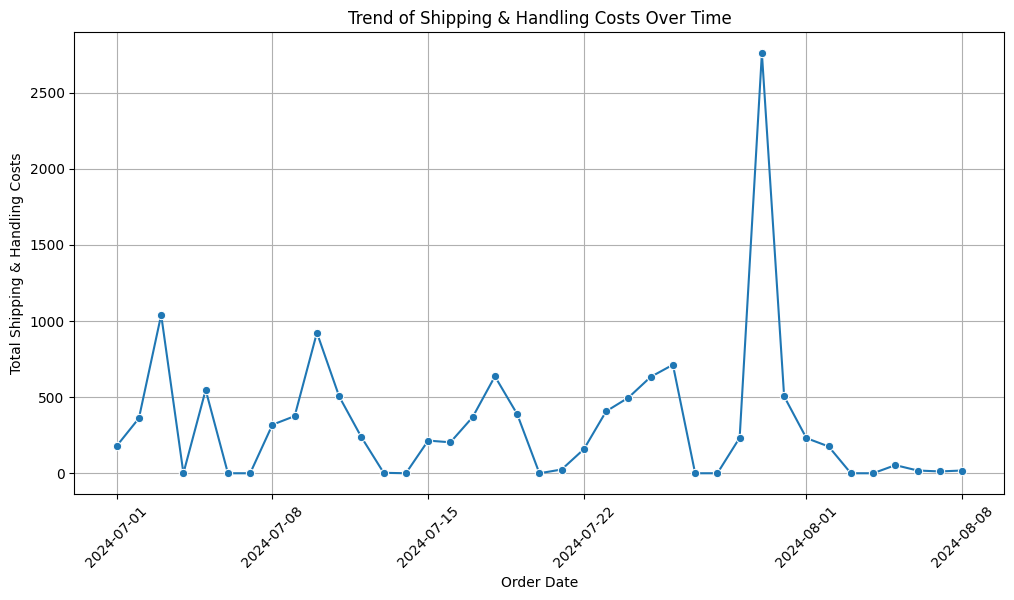

In [30]:
# Group by order_date and sum the shipping & handling costs
shipping_costs_by_date = df.groupby('order_date')['item_shipping_&_handling'].sum().reset_index()
print(shipping_costs_by_date)

# Plot the trend line
plt.figure(figsize=(12, 6))
sns.lineplot(data=shipping_costs_by_date, x='order_date', y='item_shipping_&_handling', marker='o')
plt.title('Trend of Shipping & Handling Costs Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Shipping & Handling Costs')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Pre-Processing

#### a) Detect & Handle Duplicates

In [31]:
# Check for duplicate rows in the dataframe
df.duplicated().sum()


1020

In [32]:
# Remove duplicate rows from the DataFrame in place
df.drop_duplicates(inplace=True)

#### b) Train-Test Split & Detect & Handle NaNs

In [33]:
# Drop specified columns to create feature set X and target variable y
# Ensure to handle missing values or categorical data before dropping columns
X = df.drop(["seller_profit", "order_date", "payment_date", "shipment_date"], axis=1)
y = df["seller_profit"]

# Check for missing values in X and y
print("Missing values in features:\n", X.isnull().sum())
print("Missing values in target:\n", y.isnull().sum())

# Optionally, handle missing values or categorical data preprocessing here

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Display the training features
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)

Missing values in features:
 order_day                   0
order_delivery_time         0
time_to_purchase            0
product_category            0
brand                       0
manufacturer                0
seller_name                 0
purchase_ppu                0
item_quantity               0
item_subtotal               0
item_shipping_&_handling    0
item_promotion              0
item_tax                    0
item_net_total              0
payment_amount              0
dtype: int64
Missing values in target:
 0
Training features shape: (11102, 15)
Test features shape: (2776, 15)


#### c) Detect & Handle Outliers

In [34]:
def handle_outliers(data):
    # Calculate the first quartile (25th percentile)
    q1 = np.percentile(data, 25)
    
    # Calculate the third quartile (75th percentile)
    q3 = np.percentile(data, 75)
    
    # Calculate the Interquartile Range (IQR)
    iqr = q3 - q1
    
    # Calculate the upper bound for outliers
    ub = q3 + 1.5 * iqr
    
    # Calculate the lower bound for outliers
    lb = q1 - 1.5 * iqr
    
    # Cap values above the upper bound to the upper bound
    data[data > ub] = ub
    
    # Cap values below the lower bound to the lower bound
    data[data < lb] = lb
    
    return data, ub, lb

def handle_outliers_test(test_data, ub, lb):
    # Cap values above the upper bound to the upper bound
    test_data[test_data > ub] = ub
    
    # Cap values below the lower bound to the lower bound
    test_data[test_data < lb] = lb
    
    return test_data

In [35]:
outliers = ['order_delivery_time', 'time_to_purchase', 'purchase_ppu',
            'item_quantity', 'item_subtotal', 'item_shipping_&_handling',
            'item_promotion', 'item_tax', 'item_net_total', 'payment_amount']

# Iterate over each column that is considered to have outliers
for col in outliers:
    # Handle outliers in the training set
    X_train[col], ub, lb = handle_outliers(X_train[col])
    
    # Handle outliers in the test set using the bounds obtained from the training set
    X_test[col] = handle_outliers_test(X_test[col], ub, lb)

C:\Users\minas\AppData\Local\Temp\ipykernel_23792\163437374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data > ub] = ub
C:\Users\minas\AppData\Local\Temp\ipykernel_23792\163437374.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data < lb] = lb
C:\Users\minas\AppData\Local\Temp\ipykernel_23792\163437374.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[test_data > ub] = ub
C:\Users\minas\AppData\Loca

In [36]:
# Handle outliers in the training target variable
y_train, ub, lb = handle_outliers(y_train)

# Handle outliers in the test target variable using the bounds from the training set
y_test = handle_outliers_test(y_test, ub, lb)

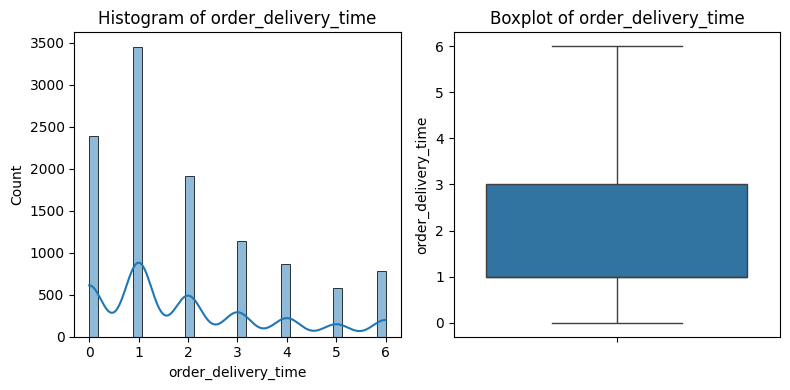

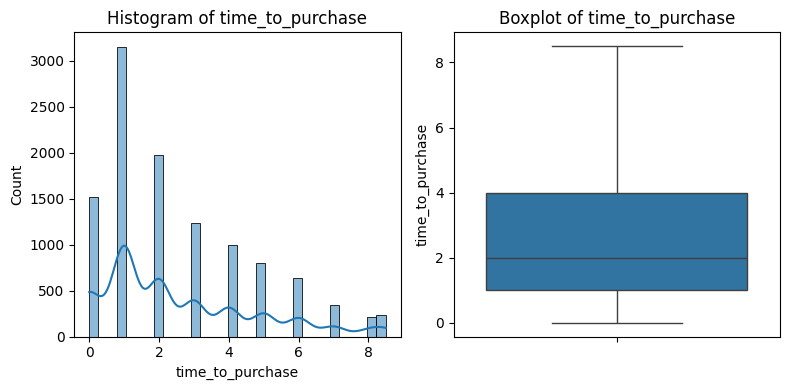

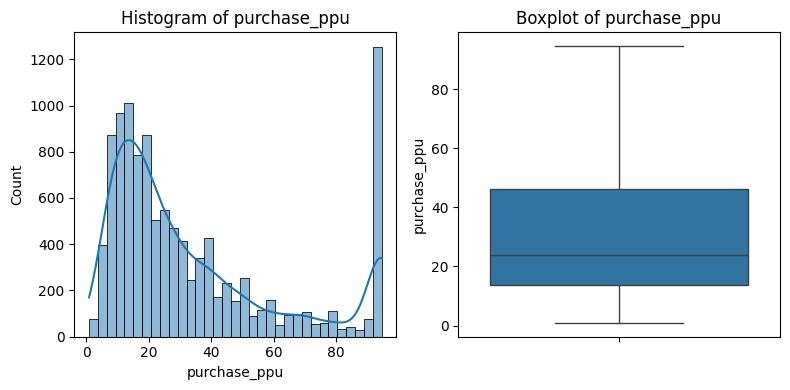

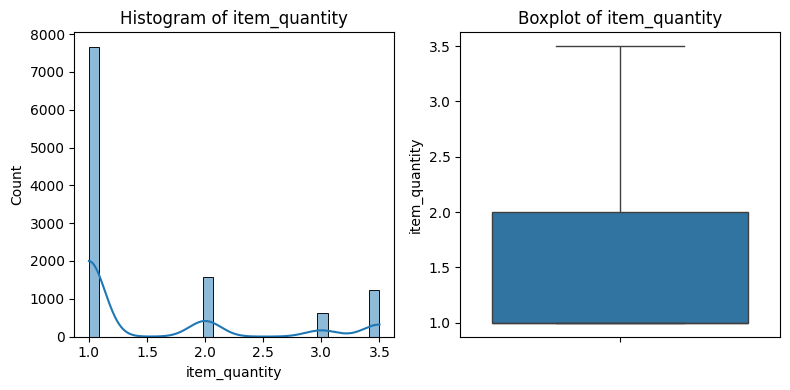

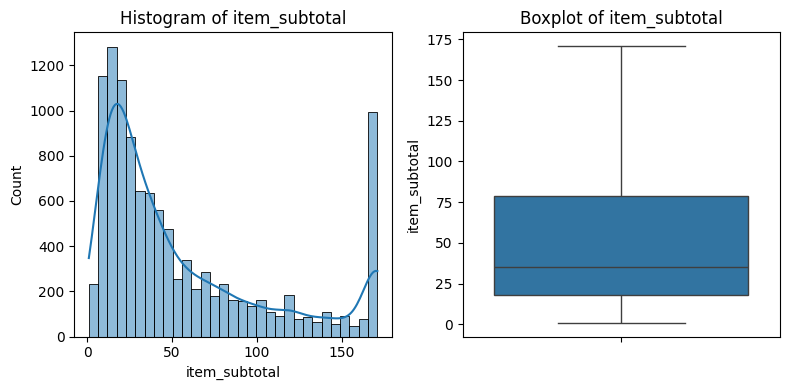

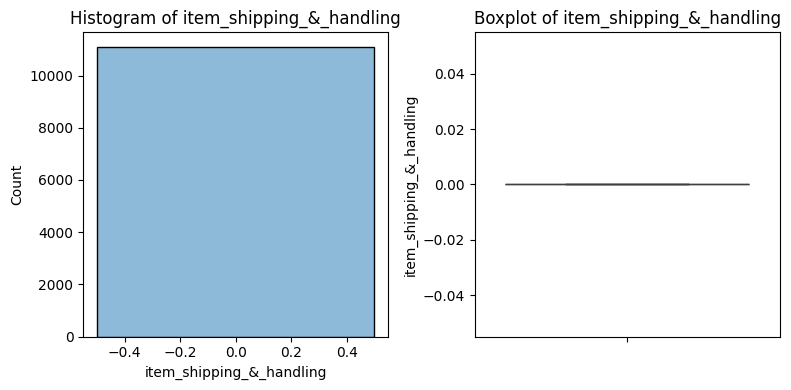

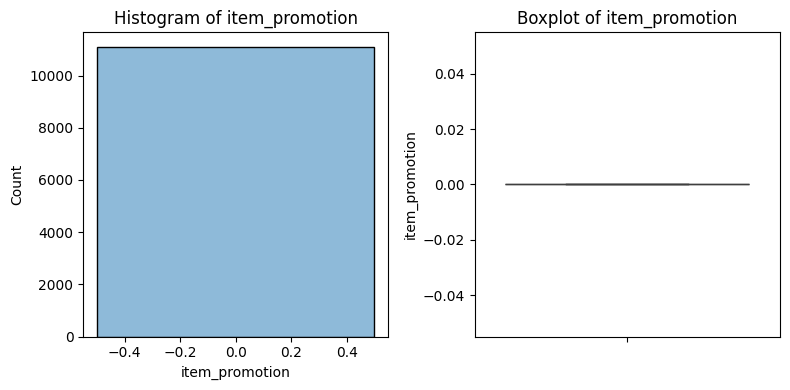

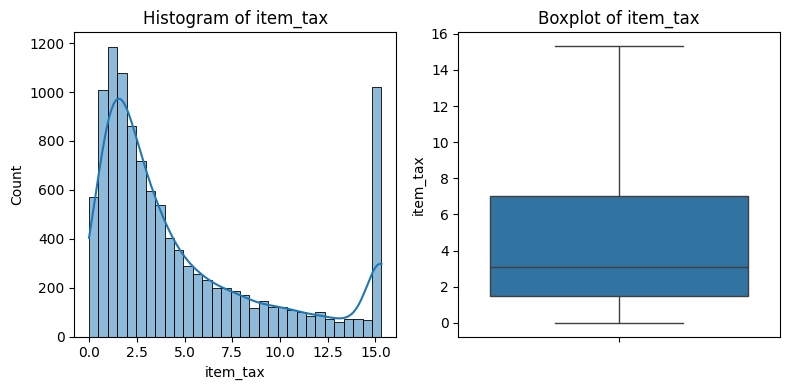

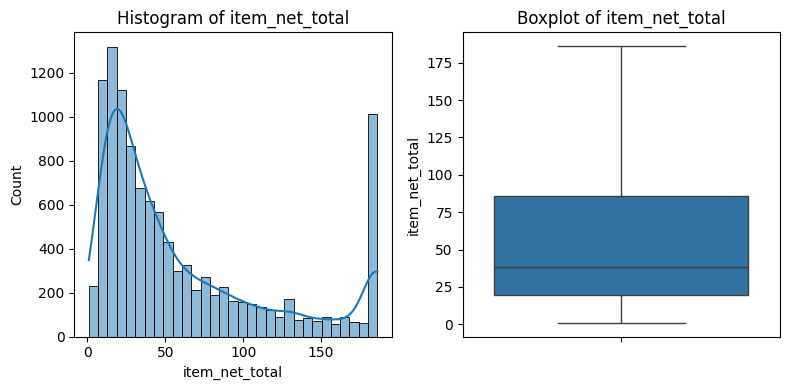

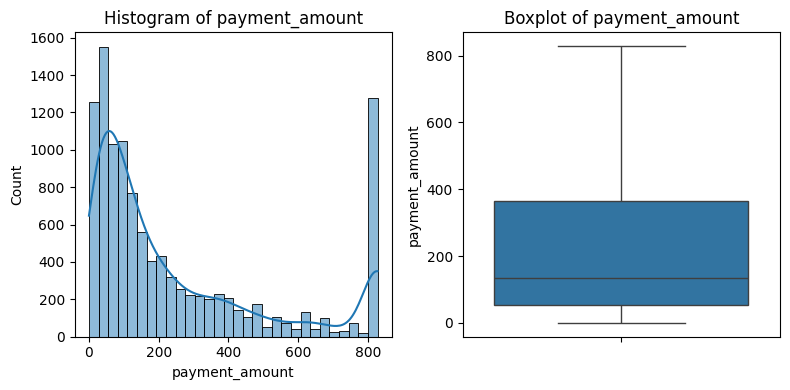

In [37]:
for col in outliers:
    # Create a figure with specified size
    plt.figure(figsize=(8, 4))
    
    # Plot histogram with KDE for the column in training data
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Histogram of {col}')
    
    # Plot boxplot for the column in training data
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[col])
    plt.title(f'Boxplot of {col}')
    
    # Adjust layout to fit subplots neatly
    plt.tight_layout()
    
    # Display the plots
    plt.show()


#### d) Encoding

In [38]:
X_train = X_train.reset_index(drop=True)
X_train

order_day  order_delivery_time  time_to_purchase  \
0         Friday                    3               3.0   
1         Friday                    3               3.0   
2         Friday                    1               1.0   
3      Wednesday                    6               8.0   
4       Thursday                    1               1.0   
...          ...                  ...               ...   
11097    Tuesday                    0               0.0   
11098     Monday                    0               5.0   
11099    Tuesday                    2               2.0   
11100     Friday                    1               3.0   
11101  Wednesday                    4               4.0   

                                        product_category          brand  \
0                                                    Toy        Crayola   
1                                           PC Accessory            KYY   
2                                                   Book              0   
3                                                   Book   Jordan Print   
4                                      Health and Beauty     Medtrition   
...                                                  ...            ...   
11097  Business, Industrial, & Scientific Supplies Basic         DIYMAG   
11098                                            Grocery  Sparkling Ice   
11099        Business, Industrial, & Scientific Supplies            SAS   
11100                                             Beauty          Diane   
11101                                            Apparel         Soojun   

                        manufacturer             seller_name  purchase_ppu  \
0                            Crayola                  Amazon        60.850   
1                                KYY               KYY Tech.        79.990   
2              McGraw-Hill Education  Shakespeare Book House        13.570   
3                       Jordan Print                  Amazon        23.990   
4                         Medtrition              Medtrition        38.500   
...                              ...                     ...           ...   
11097                         DIYMAG                  DIYMAG        26.990   
11098  Talking Rain Beverage Company                  Amazon        10.980   
11099                     SAS Safety                  G.P.S.        94.545   
11100                          Diane             Maya Beauty         5.410   
11101                              0          Soojun limited        23.190   

       item_quantity  item_subtotal  item_shipping_&_handling  item_promotion  \
0                1.0          60.85                       0.0             0.0   
1                1.0          79.99                       0.0             0.0   
2                1.0          13.57                       0.0             0.0   
3                3.0          71.97                       0.0             0.0   
4                1.0          38.50                       0.0             0.0   
...              ...            ...                       ...             ...   
11097            1.0          26.99                       0.0             0.0   
11098            1.0          10.98                       0.0             0.0   
11099            1.0         169.89                       0.0             0.0   
11100            3.5          21.64                       0.0             0.0   
11101            1.0          23.19                       0.0             0.0   

       item_tax  item_net_total  payment_amount  
0          5.84           66.09          405.58  
1          8.32           88.31           88.31  
2          1.77           19.33           19.33  
3          7.26           79.23          183.77  
4          0.00           38.50           38.50  
...         ...             ...             ...  
11097      2.67           28.31           45.71  
11098      0.91           11.89          207.69  
11099     14.61          184.50      

In [39]:
# Reset the index for X_train and X_test
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)


In [40]:
# Print the number of unique values for each nominal column in X_train
for i in X_train.select_dtypes(include="O").columns:
    print(f"{i} --> {X_train[i].nunique()}")

order_day --> 7
product_category --> 59
brand --> 5196
manufacturer --> 5234
seller_name --> 4348


In [41]:
# Initialize the OneHotEncoder
ohe_encoder = OneHotEncoder(sparse=False) 

# Fit and transform the 'order_day' column
result = ohe_encoder.fit_transform(X_train[["order_day"]])

# Display the result
print("One-Hot Encoded Array:\n", result)


One-Hot Encoded Array:
 [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


c:\Users\minas\anaconda3\envs\Machine_learning\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [42]:
# Create a DataFrame from the one-hot encoded results
nominal_encoded_train = pd.DataFrame(result, columns=ohe_encoder.get_feature_names_out())

# Display the DataFrame
nominal_encoded_train

order_day_Friday  order_day_Monday  order_day_Saturday  \
0                   1.0               0.0                 0.0   
1                   1.0               0.0                 0.0   
2                   1.0               0.0                 0.0   
3                   0.0               0.0                 0.0   
4                   0.0               0.0                 0.0   
...                 ...               ...                 ...   
11097               0.0               0.0                 0.0   
11098               0.0               1.0                 0.0   
11099               0.0               0.0                 0.0   
11100               1.0               0.0                 0.0   
11101               0.0               0.0                 0.0   

       order_day_Sunday  order_day_Thursday  order_day_Tuesday  \
0                   0.0                 0.0                0.0   
1                   0.0                 0.0                0.0   
2                   0.0                 0.0                0.0   
3                   0.0                 0.0                0.0   
4                   0.0                 1.0                0.0   
...                 ...                 ...                ...   
11097               0.0                 0.0                1.0   
11098               0.0                 0.0                0.0   
11099               0.0                 0.0                1.0   
11100               0.0                 0.0                0.0   
11101               0.0                 0.0                0.0   

       order_day_Wednesday  
0                      0.0  
1                      0.0  
2                      0.0  
3                      1.0  
4                      0.0  
...                    ...  
11097                  0.0  
11098                  0.0  
11099                  0.0  
11100                  0.0  
11101                  1.0  

[11102 rows x 7 columns]

In [43]:
# Transform the 'order_day' feature in the test set using the fitted encoder
result = ohe_encoder.transform(X_test[['order_day']])

# Create a DataFrame for the encoded test set
# Columns are named using the feature names generated by the encoder
nominal_encoded_test = pd.DataFrame(result, columns=ohe_encoder.get_feature_names_out())

# Display the resulting encoded DataFrame for the test set
nominal_encoded_test

order_day_Friday  order_day_Monday  order_day_Saturday  \
0                  0.0               1.0                 0.0   
1                  0.0               0.0                 0.0   
2                  0.0               0.0                 0.0   
3                  0.0               0.0                 0.0   
4                  0.0               0.0                 0.0   
...                ...               ...                 ...   
2771               0.0               0.0                 1.0   
2772               0.0               0.0                 0.0   
2773               0.0               1.0                 0.0   
2774               0.0               0.0                 0.0   
2775               0.0               0.0                 0.0   

      order_day_Sunday  order_day_Thursday  order_day_Tuesday  \
0                  0.0                 0.0                0.0   
1                  0.0                 1.0                0.0   
2                  0.0                 0.0                0.0   
3                  0.0                 0.0                1.0   
4                  0.0                 0.0                0.0   
...                ...                 ...                ...   
2771               0.0                 0.0                0.0   
2772               0.0                 0.0                1.0   
2773               0.0                 0.0                0.0   
2774               0.0                 1.0                0.0   
2775               0.0                 0.0                1.0   

      order_day_Wednesday  
0                     0.0  
1                     0.0  
2                     1.0  
3                     0.0  
4                     1.0  
...                   ...  
2771                  0.0  
2772                  0.0  
2773                  0.0  
2774                  0.0  
2775                  0.0  

[2776 rows x 7 columns]

In [44]:
# Initialize the BinaryEncoder
bn_encoder = BinaryEncoder()

# Fit and transform the categorical features in the training set using binary encoding
# This will convert the 'product_category', 'brand', 'manufacturer', and 'seller_name' columns to binary encoded columns
nominal_encoded_train_2 = bn_encoder.fit_transform(X_train[["product_category", "brand", "manufacturer", "seller_name"]])

# Display the resulting DataFrame with binary encoded features
nominal_encoded_train_2

product_category_0  product_category_1  product_category_2  \
0                       0                   0                   0   
1                       0                   0                   0   
2                       0                   0                   0   
3                       0                   0                   0   
4                       0                   0                   0   
...                   ...                 ...                 ...   
11097                   0                   0                   0   
11098                   0                   1                   1   
11099                   1                   0                   1   
11100                   0                   0                   1   
11101                   0                   0                   1   

       product_category_3  product_category_4  product_category_5  brand_0  \
0                       0                   0                   1        0   
1                       0                   1                   0        0   
2                       0                   1                   1        0   
3                       0                   1                   1        0   
4                       1                   0                   0        0   
...                   ...                 ...                 ...      ...   
11097                   1                   0                   1        0   
11098                   1                   0                   0        0   
11099                   0                   0                   1        1   
11100                   0                   1                   1        0   
11101                   1                   0                   0        0   

       brand_1  brand_2  brand_3  ...  seller_name_3  seller_name_4  \
0            0        0        0  ...              0              0   
1            0        0        0  ...              0              0   
2            0        0        0  ...              0              0   
3            0        0        0  ...              0              0   
4            0        0        0  ...              0              0   
...        ...      ...      ...  ...            ...            ...   
11097        1        0        0  ...              1              1   
11098        0        1        1  ...              0              0   
11099        0        1        0  ...              0              0   
11100        0        1        0  ...              0              0   
11101        0        0        1  ...              0              1   

       seller_name_5  seller_name_6  seller_name_7  seller_name_8  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
11097              0              0              0              0   
11098              0              0              0              0   
11099              0              0              1              1   
11100              0              1              1              1   
11101              0              1              1              0   

       seller_name_9  seller_name_10  seller_name_11  seller_name_12  
0                  0               0               0               1  
1                  0               0               1               0  
2                  0               0               1               1  
3                  0               0               0               1  
4                  0               1               0               0  
...              ...             ...             ...             ...  
11097              1               0               0          

In [45]:
# Transform the test data using the previously fitted BinaryEncoder
# This will apply the same binary encoding to the test data for the specified columns
nominal_encoded_test_2 = bn_encoder.transform(X_test[["product_category", "brand", "manufacturer", "seller_name"]])

# Display the resulting DataFrame with binary encoded features for the test set
nominal_encoded_test_2

product_category_0  product_category_1  product_category_2  \
0                      0                   0                   1   
1                      0                   1                   1   
2                      0                   0                   1   
3                      0                   1                   0   
4                      0                   0                   0   
...                  ...                 ...                 ...   
2771                   0                   0                   0   
2772                   0                   0                   0   
2773                   0                   0                   1   
2774                   0                   0                   0   
2775                   0                   0                   0   

      product_category_3  product_category_4  product_category_5  brand_0  \
0                      1                   0                   0        0   
1                      0                   0                   1        0   
2                      1                   0                   1        0   
3                      0                   1                   0        0   
4                      1                   1                   0        0   
...                  ...                 ...                 ...      ...   
2771                   1                   0                   0        0   
2772                   0                   1                   1        0   
2773                   0                   0                   0        0   
2774                   1                   0                   0        0   
2775                   1                   0                   0        0   

      brand_1  brand_2  brand_3  ...  seller_name_3  seller_name_4  \
0           1        0        1  ...              0              0   
1           0        0        0  ...              0              0   
2           0        0        0  ...              0              0   
3           0        1        1  ...              0              1   
4           1        0        1  ...              0              0   
...       ...      ...      ...  ...            ...            ...   
2771        0        0        0  ...              0              0   
2772        0        0        0  ...              0              0   
2773        1        0        0  ...              1              1   
2774        0        0        0  ...              0              0   
2775        0        0        1  ...              0              0   

      seller_name_5  seller_name_6  seller_name_7  seller_name_8  \
0                 0              0              0              1   
1                 1              1              0              1   
2                 0              0              0              0   
3                 1              1              0              1   
4                 0              1              1              0   
...             ...            ...            ...            ...   
2771              0              0              0              0   
2772              0              0              0              0   
2773              0              0              0              1   
2774              0              0              0              0   
2775              1              0              0              0   

      seller_name_9  seller_name_10  seller_name_11  seller_name_12  
0                 1               1               0               0  
1                 0               1               1               0  
2                 0               0               0               0  
3                 1               0               1               1  
4                 1               0               1               0  
...             ...             ...             ...             ...  
2771              0               0               0               0  
2772              0               0           

In [46]:
# Combine one-hot encoded columns and binary encoded columns for the training data
# This merges the DataFrames horizontally (side by side) to create a single DataFrame with all encoded features
nominal_train = pd.concat([nominal_encoded_train, nominal_encoded_train_2], axis=1)

# Combine one-hot encoded columns and binary encoded columns for the test data
# This merges the DataFrames horizontally (side by side) to create a single DataFrame with all encoded features
nominal_test = pd.concat([nominal_encoded_test, nominal_encoded_test_2], axis=1)

In [47]:
# Display the nominal_train DataFrame
nominal_train

order_day_Friday  order_day_Monday  order_day_Saturday  \
0                   1.0               0.0                 0.0   
1                   1.0               0.0                 0.0   
2                   1.0               0.0                 0.0   
3                   0.0               0.0                 0.0   
4                   0.0               0.0                 0.0   
...                 ...               ...                 ...   
11097               0.0               0.0                 0.0   
11098               0.0               1.0                 0.0   
11099               0.0               0.0                 0.0   
11100               1.0               0.0                 0.0   
11101               0.0               0.0                 0.0   

       order_day_Sunday  order_day_Thursday  order_day_Tuesday  \
0                   0.0                 0.0                0.0   
1                   0.0                 0.0                0.0   
2                   0.0                 0.0                0.0   
3                   0.0                 0.0                0.0   
4                   0.0                 1.0                0.0   
...                 ...                 ...                ...   
11097               0.0                 0.0                1.0   
11098               0.0                 0.0                0.0   
11099               0.0                 0.0                1.0   
11100               0.0                 0.0                0.0   
11101               0.0                 0.0                0.0   

       order_day_Wednesday  product_category_0  product_category_1  \
0                      0.0                   0                   0   
1                      0.0                   0                   0   
2                      0.0                   0                   0   
3                      1.0                   0                   0   
4                      0.0                   0                   0   
...                    ...                 ...                 ...   
11097                  0.0                   0                   0   
11098                  0.0                   0                   1   
11099                  0.0                   1                   0   
11100                  0.0                   0                   0   
11101                  1.0                   0                   0   

       product_category_2  ...  seller_name_3  seller_name_4  seller_name_5  \
0                       0  ...              0              0              0   
1                       0  ...              0              0              0   
2                       0  ...              0              0              0   
3                       0  ...              0              0              0   
4                       0  ...              0              0              0   
...                   ...  ...            ...            ...            ...   
11097                   0  ...              1              1              0   
11098                   1  ...              0              0              0   
11099                   1  ...              0              0              0   
11100                   1  ...              0              0              0   
11101                   1  ...              0              1              0   

       seller_name_6  seller_name_7  seller_name_8  seller_name_9  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
11097              0              0              0              1   
11098              0              0              0              0   
11099              0  

In [48]:
# Display the nominal_test DataFrame
nominal_test

order_day_Friday  order_day_Monday  order_day_Saturday  \
0                  0.0               1.0                 0.0   
1                  0.0               0.0                 0.0   
2                  0.0               0.0                 0.0   
3                  0.0               0.0                 0.0   
4                  0.0               0.0                 0.0   
...                ...               ...                 ...   
2771               0.0               0.0                 1.0   
2772               0.0               0.0                 0.0   
2773               0.0               1.0                 0.0   
2774               0.0               0.0                 0.0   
2775               0.0               0.0                 0.0   

      order_day_Sunday  order_day_Thursday  order_day_Tuesday  \
0                  0.0                 0.0                0.0   
1                  0.0                 1.0                0.0   
2                  0.0                 0.0                0.0   
3                  0.0                 0.0                1.0   
4                  0.0                 0.0                0.0   
...                ...                 ...                ...   
2771               0.0                 0.0                0.0   
2772               0.0                 0.0                1.0   
2773               0.0                 0.0                0.0   
2774               0.0                 1.0                0.0   
2775               0.0                 0.0                1.0   

      order_day_Wednesday  product_category_0  product_category_1  \
0                     0.0                   0                   0   
1                     0.0                   0                   1   
2                     1.0                   0                   0   
3                     0.0                   0                   1   
4                     1.0                   0                   0   
...                   ...                 ...                 ...   
2771                  0.0                   0                   0   
2772                  0.0                   0                   0   
2773                  0.0                   0                   0   
2774                  0.0                   0                   0   
2775                  0.0                   0                   0   

      product_category_2  ...  seller_name_3  seller_name_4  seller_name_5  \
0                      1  ...              0              0              0   
1                      1  ...              0              0              1   
2                      1  ...              0              0              0   
3                      0  ...              0              1              1   
4                      0  ...              0              0              0   
...                  ...  ...            ...            ...            ...   
2771                   0  ...              0              0              0   
2772                   0  ...              0              0              0   
2773                   1  ...              1              1              0   
2774                   0  ...              0              0              0   
2775                   0  ...              0              0              1   

      seller_name_6  seller_name_7  seller_name_8  seller_name_9  \
0                 0              0              1              1   
1                 1              0              1              0   
2                 0              0              0              0   
3                 1              0              1              1   
4                 1              1              0              1   
...             ...            ...            ...            ...   
2771              0              0              0              0   
2772              0              0              0              0   
2773              0              0              1              0   
2774      

In [49]:
# Drop categorical columns that have been encoded
X_train.drop(["product_category", "brand", "manufacturer", "seller_name", "order_day"], axis=1, inplace=True)
X_test.drop(["product_category", "brand", "manufacturer", "seller_name", "order_day"], axis=1, inplace=True)

In [50]:
# Concatenate the one-hot encoded and binary encoded columns with the training data
X_train = pd.concat([X_train, nominal_train], axis=1)

# Concatenate the one-hot encoded and binary encoded columns with the test data
X_test = pd.concat([X_test, nominal_test], axis=1)

#### e) Scaling

In [51]:
# Initialize the StandardScaler
standard_scaler = StandardScaler()

# List of columns to be scaled
columns_to_scale = ['order_delivery_time', 'time_to_purchase', 'purchase_ppu', 'item_quantity', 'item_subtotal',
         'item_shipping_&_handling', 'item_promotion', 'item_tax', 'item_net_total', 'payment_amount']
# Fit the scaler on the training data and transform the specified columns
X_train[columns_to_scale] = standard_scaler.fit_transform(X_train[columns_to_scale])

# Transform the same columns in the test data using the scaler fitted on the training data
X_test[columns_to_scale] = standard_scaler.transform(X_test[columns_to_scale])

# Display the transformed training data
X_train


order_delivery_time  time_to_purchase  purchase_ppu  item_quantity  \
0                 0.589184          0.187547      0.936029      -0.603487   
1                 0.589184          0.187547      1.618555      -0.603487   
2                -0.534238         -0.717931     -0.749960      -0.603487   
3                 2.274317          2.451241     -0.378387       1.667477   
4                -0.534238         -0.717931      0.139035      -0.603487   
...                    ...               ...           ...            ...   
11097            -1.095949         -1.170670     -0.271408      -0.603487   
11098            -1.095949          1.093025     -0.842319      -0.603487   
11099             0.027473         -0.265192      2.137581      -0.603487   
11100            -0.534238          0.187547     -1.040943       2.235218   
11101             1.150895          0.640286     -0.406914      -0.603487   

       item_subtotal  item_shipping_&_handling  item_promotion  item_tax  \
0           0.097226                       0.0             0.0  0.197146   
1           0.474057                       0.0             0.0  0.732132   
2          -0.833630                       0.0             0.0 -0.680835   
3           0.316158                       0.0             0.0  0.503468   
4          -0.342804                       0.0             0.0 -1.062660   
...              ...                       ...             ...       ...   
11097      -0.569415                       0.0             0.0 -0.486687   
11098      -0.884622                       0.0             0.0 -0.866354   
11099       2.244023                       0.0             0.0  2.089011   
11100      -0.674747                       0.0             0.0 -0.648477   
11101      -0.644230                       0.0             0.0 -0.557875   

       item_net_total  payment_amount  ...  seller_name_3  seller_name_4  \
0            0.094319        0.579912  ...              0              0   
1            0.494488       -0.620492  ...              0              0   
2           -0.747800       -0.881481  ...              0              0   
3            0.330963       -0.259315  ...              0              0   
4           -0.402560       -0.808951  ...              0              0   
...               ...             ...  ...            ...            ...   
11097       -0.586076       -0.781671  ...              1              1   
11098       -0.881790       -0.168813  ...              0              0   
11099        2.226812       -0.256553  ...              0              0   
11100       -0.671620       -0.621022  ...              0              0   
11101       -0.636142       -0.315615  ...              0              1   

       seller_name_5  seller_name_6  seller_name_7  seller_name_8  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
11097              0              0              0              0   
11098              0              0              0              0   
11099              0              0              1              1   
11100              0              1              1              1   
11101              0              1              1              0   

       seller_name_9  seller_name_10  seller_name_11  seller_name_12  
0                  0               0               0               1  
1                  0               0               1               0  
2                  0               0               1               1  
3                  0               0               0               1  
4                  0               1               0               0  
.

In [52]:
# Display statistical summary of the training data
X_train.describe()

order_delivery_time  time_to_purchase  purchase_ppu  item_quantity  \
count         1.110200e+04      1.110200e+04  1.110200e+04   1.110200e+04   
mean         -1.216025e-17     -8.064167e-17 -1.139224e-16   8.448175e-17   
std           1.000045e+00      1.000045e+00  1.000045e+00   1.000045e+00   
min          -1.095949e+00     -1.170670e+00 -1.200342e+00  -6.034868e-01   
25%          -5.342377e-01     -7.179308e-01 -7.446115e-01  -6.034868e-01   
50%          -5.342377e-01     -2.651919e-01 -3.783867e-01  -6.034868e-01   
75%           5.891844e-01      6.402858e-01  4.082656e-01   5.319950e-01   
max           2.274317e+00      2.677611e+00  2.137581e+00   2.235218e+00   

       item_subtotal  item_shipping_&_handling  item_promotion      item_tax  \
count   1.110200e+04                   11102.0         11102.0  1.110200e+04   
mean   -7.360153e-17                       0.0             0.0  8.320173e-18   
std     1.000045e+00                       0.0             0.0  1.000045e+00   
min    -1.081110e+00                       0.0             0.0 -1.062660e+00   
25%    -7.470021e-01                       0.0             0.0 -7.412366e-01   
50%    -4.046250e-01                       0.0             0.0 -4.025561e-01   
75%     4.565350e-01                       0.0             0.0  4.516955e-01   
max     2.261840e+00                       0.0             0.0  2.241094e+00   

       item_net_total  payment_amount  ...  seller_name_3  seller_name_4  \
count    1.110200e+04    1.110200e+04  ...   11102.000000   11102.000000   
mean     1.536032e-17   -6.112127e-17  ...       0.264817       0.280580   
std      1.000045e+00    1.000045e+00  ...       0.441256       0.449303   
min     -1.077912e+00   -9.546170e-01  ...       0.000000       0.000000   
25%     -7.475748e-01   -7.477708e-01  ...       0.000000       0.000000   
50%     -4.040006e-01   -4.459955e-01  ...       0.000000       0.000000   
75%      4.537417e-01    4.225923e-01  ...       1.000000       1.000000   
max      2.255717e+00    2.178137e+00  ...       1.000000       1.000000   

       seller_name_5  seller_name_6  seller_name_7  seller_name_8  \
count   11102.000000   11102.000000   11102.000000   11102.000000   
mean        0.288326       0.295172       0.300847       0.296163   
std         0.453004       0.456141       0.458647       0.456584   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       1.000000       1.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

       seller_name_9  seller_name_10  seller_name_11  seller_name_12  
count   11102.000000    11102.000000    11102.000000    11102.000000  
mean        0.299315        0.312016        0.307422        0.693569  
std         0.457979        0.463337        0.461447        0.461032  
min         0.000000        0.000000        0.000000        0.000000  
25%         0.000000        0.000000        0.000000        0.000000  
50%         0.000000        0.000000        0.000000        1.000000  
75%         1.000000        1.000000        1.000000        1.000000  
max         1.000000        1.000000        1.000000        1.000000  

[8 rows x 62 columns]

In [53]:
# Create copies of the original DataFrames
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

#### f) Save Processed Data

In [54]:
# Save the preprocessed training features to a CSV file
X_train_scaled.to_csv("X_train_scaled.csv", index=False)

# Save the preprocessed test features to a CSV file
X_test_scaled.to_csv("X_test_scaled.csv", index=False)

# Save the training target variable to a CSV file
y_train.to_csv("y_train.csv", index=False)

# Save the test target variable to a CSV file
y_test.to_csv("y_test.csv", index=False)
